<h1><center><b> Home Credit Default Risk - Modeling </b></center></h1>

### Author: Sai Eshwar Tadepalli

<h1><center><b>Table of Contents</b></center></h1>

1. <a href="#1">Introduction</a>
2. <a href="#2">EDA</a><br>
  2.1 <a href="#21">Import & Inspect Dataset</a><br>
  2.2 <a href="#22">Target Variable Exploration</a><br>
  2.3 <a href="#23">Explore the relationship between target and predictors</a><br>
  2.4 <a href="#24">Missing Value Analysis and Imputation</a><br>
  2.5 <a href="#25">Univariate Analysis</a><br>
  2.6 <a href="#27">Data Transformation - One Hot encoding</a><br>
  2.7 <a href="#28">EDA Summary</a><br>
3. <a href="#3">Additional Data Preparation for Modelling</a><br>
  3.1 <a href="#31">Data Transformation - One Hot encoding</a><br>
  3.2 <a href="#32">Feature Engineering</a><br>
  3.3 <a href="#33">Data Split into Train & Test</a><br>
  3.4 <a href="#34">Feature Scaling</a><br>
4. <a href="#4">Modeling</a><br>
  4.1 <a href="#41">Logistic Regression</a><br>
  4.2 <a href="#42">Random Forest</a><br>
  4.3 <a href="#43">XGBoost</a><br>
  4.4 <a href="#44">Neural Network</a><br>
  4.5 <a href="#45">Light BGM</a><br>
  4.6 <a href="#46">ROC-AUC Function</a><br>
  4.7 <a href="#47">Down Sampling</a><br>
  4.8 <a href="#48">SMOTE</a><br>
  4.9 <a href="#49">Feature Importance</a><br>
5. <a href="#5">Results</a><br>
  5.1 <a href="#51">Final Predictions</a><br>
  5.2 <a href="#52">Final Model Scores</a><br>
  5.3 <a href="#53">Final Interpretation & Model Selection Criteria</a><br>
6. <a href="#6">Group Member Contributions</a>
7. <a href="#7">Appendix</a><br>
  7.1 <a href="#71">Bivariate Analysis</a><br>

# **1. Introduction** <a name='1'></a>

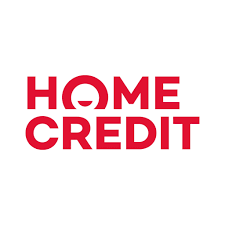






Many people struggle to get loans due to insufficient or non-existent credit histories and this population is often taken advantage of by untrustworthy lenders. Home Credit, a consumer finance firm provides loans dedicated to the unbanked population. This financial inclusion effort often costs Home Credit as it involves a high risk of loan defaults. However, the business strives to ensure that clients capable of repayment are not rejected from lending. Hence, to be able to take better lending decisions, the firm wants to use historical loan application data to predict whether or not an applicant will be able to repay the loan.



The solution to this problem would include the development of supervised predictive classification models since we have historical labelled data and as the outcome of the target variable is binary with values of 0 and 1, indicating that the potential customer will repay the loan on time or will have difficulty repaying loan respectively. This involves Logistic Regression and use of ensemble methods for extracting a list of customers with higher probabilities of loan repayment. The client’s repayment prediction will be based on alternate data to loan history such as telco and transactional information.

Before we delve into building models, lets perform EDA. EDA generally involves the following:
1. Import & inspect dataset along with the target variable
2. Explore the relationship between target and predictors
3. Scope of missing values; imputing
4. One hot encoding of the categorical variables
5. Univariate analysis
6. Bivariate analysis
7. Testing for Hypothesis
8. Joining the Bureau and previous application tables and inspecting again

# **2. EDA & Data Preparation** <a name="2"></a>

## **2.1 Import & Inspect Dataset** <a name="21"></a>

In [ ]:
# importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Setting the warnings to be ignored
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/home-credit-default-risk/
# reading the application_train files and displaying the shape

application_train = pd.read_csv("application_train.csv")
application_train.shape

Mounted at /content/drive/
/content/drive/MyDrive/home-credit-default-risk


(307511, 122)

In [ ]:
# Modifying the default column properties to display more number of columns
pd.set_option('display.max_columns', 130)
pd.set_option('display.width', 500)

# printing 2 rows
application_train.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## **2.2 Target Variable Exploration** <a name="22"></a>

In [ ]:
# Target value proportions
application_train['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

This shows that the target variable in the dataset is imbalanced. About 91.92% of the population in the train set repaid on time. Due to this imbalance, we might have to perform stratified sampling while creating train and test sets. Moreover, 91.92 being the majority class accuracy becomes the accuracy benchmark for our predictive machine learning models.

Text(0.5, 1.0, 'Count of Target Variable values')

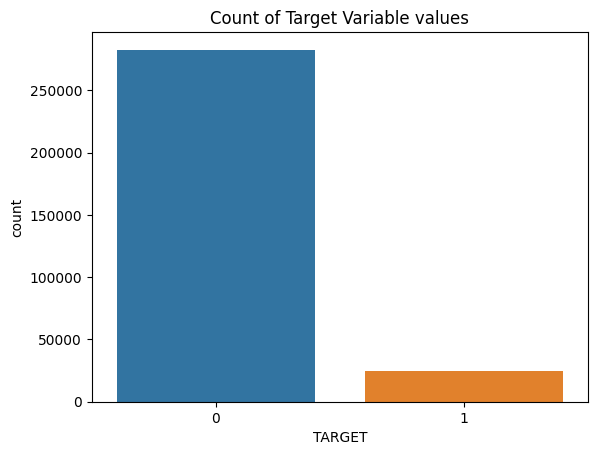

In [ ]:
# visulaizing through a count plot
sns.countplot(x ='TARGET', data=application_train)
plt.title('Count of Target Variable values')

## **2.3 Explore the relationship between Target and Predictors** <a name="23"></a>

In [ ]:
# correlation matrix
cor = pd.DataFrame(application_train.corr())
cor = cor.sort_values('TARGET',ascending=False)

In [ ]:
# extracting the column that shows only the correlation with the target variable
cor = cor.iloc[1:,1]

# Top Positive & Negative correlated predictors with the target variable
print('Positively correlated top 5 predictors:\n\n', cor.head(5))
print('\n\n Negatively correlated top 5 predictors:\n\n',cor.tail(5).sort_values(ascending=True))

Positively correlated top 5 predictors:

 DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
Name: TARGET, dtype: float64


 Negatively correlated top 5 predictors:

 EXT_SOURCE_3    -0.178919
EXT_SOURCE_2    -0.160472
EXT_SOURCE_1    -0.155317
DAYS_EMPLOYED   -0.044932
FLOORSMAX_AVG   -0.044003
Name: TARGET, dtype: float64


**Target variable correlation with all the Predictors:**

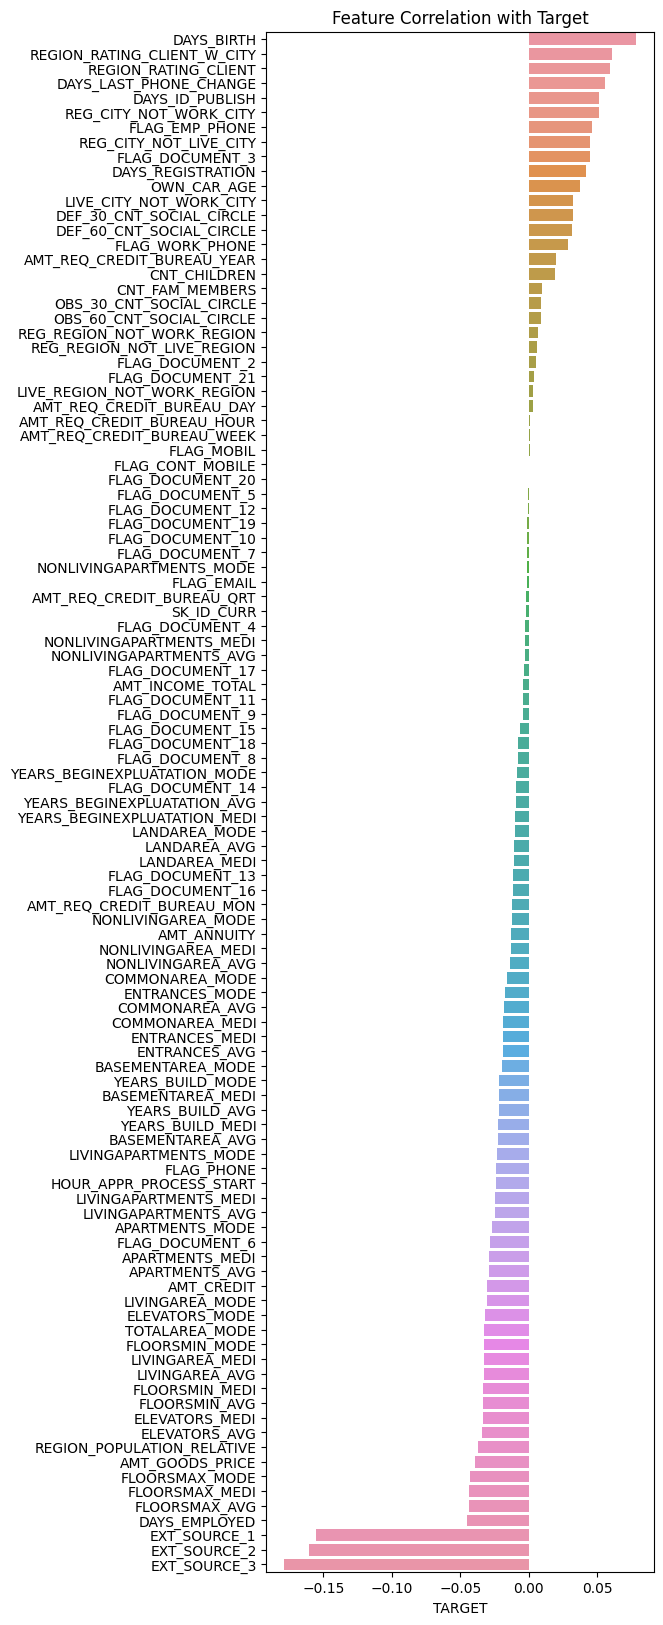

In [ ]:
# Visualizing correlation
plt.figure(figsize=(5, 20))
sns.barplot(y=cor.index, x=cor)
plt.title("Feature Correlation with Target")
plt.show()

The plot is in sync with the top correalted result obtained. There seems to be many predictors having very low and insignificant impact on the loan repayment prediction. We will be investigating further before dropping them.

## **2.4 Missing Value Analysis and Imputation** <a name="24"></a>



In [ ]:
# Modifying the default row properties to display more number of rows
pd.set_option('display.max_rows', 70)

# missing values
missing_value = (application_train.isnull().mean() * 100).round()

# Create a new DataFrame to display the results
missing_info = pd.DataFrame({'Column Name': missing_value.index, 'Missing Percentage': missing_value.values})

# missing_info[missing_info['Missing Percentage']>0].sort_values('Missing Percentage',ascending=False)

We cannot be sure at this point to decide which columns to drop just by looking at the missing values and correlation. Lets merge missing value DF with the cor DF to display missing value percentages along with the correlation to the target variable.

In [ ]:
# Displaying column missing value % along with its correlation with the target variable
cor = pd.DataFrame(cor)
missing_cor_df = pd.merge(missing_info, cor, left_on='Column Name', right_on = cor.index)
missing_cor_df[missing_cor_df['Missing Percentage']>0].sort_values('Missing Percentage',ascending=False).head(10)

,Column Name,Missing Percentage,TARGET
49,COMMONAREA_MODE,70.0,-0.016340
35,COMMONAREA_AVG,70.0,-0.018550
63,COMMONAREA_MEDI,70.0,-0.018573
57,NONLIVINGAPARTMENTS_MODE,69.0,-0.001557
71,NONLIVINGAPARTMENTS_MEDI,69.0,-0.002757
43,NONLIVINGAPARTMENTS_AVG,69.0,-0.003176
69,LIVINGAPARTMENTS_MEDI,68.0,-0.024621
53,FLOORSMIN_MODE,68.0,-0.032698
67,FLOORSMIN_MEDI,68.0,-0.033394
55,LIVINGAPARTMENTS_MODE,68.0,-0.023393


**Dropping columns with missing value percentage greater than 48% since next highest in the sorted list is only 20%. However, External source 1 is one of the important predictors from the correlation matrix. Hence, lets drop all the columns with missing value percentage greater than 48% but excluding EXT_SOURCE_1.**

In [ ]:
# Extracting columns with missing value percent greater than 48
missing_cor_df = missing_cor_df[missing_cor_df['Missing Percentage'] >= 48]
missing_cor_columns = missing_cor_df[missing_cor_df['Column Name'] != 'EXT_SOURCE_1']['Column Name']

In [ ]:
# dropping columns with missing value percent greater than 48
application_train_clean = application_train.drop(columns=missing_cor_columns, axis=1)
application_train_clean.shape

(307511, 78)

We are now left with 78 predictors. Let's impute the remaining missing values.

### **Missing Value Imputation**



Imputing the object type variables with Mode and numeric type with Median:

In [ ]:
for column in application_train_clean.columns:
    if application_train_clean[column].dtype == 'object':
        application_train_clean[column].fillna(application_train_clean[column].mode()[0], inplace=True)

for column in application_train_clean.columns:
    if application_train_clean[column].dtype == 'float':
        application_train_clean[column].fillna(application_train_clean[column].median(), inplace=True)

Verifying missing value count in all columns

In [ ]:
application_train_clean.isna().sum().sum()

0

We now have handled NAs in the dataset.

## **2.5 Univariate Analysis** <a name="25"></a>

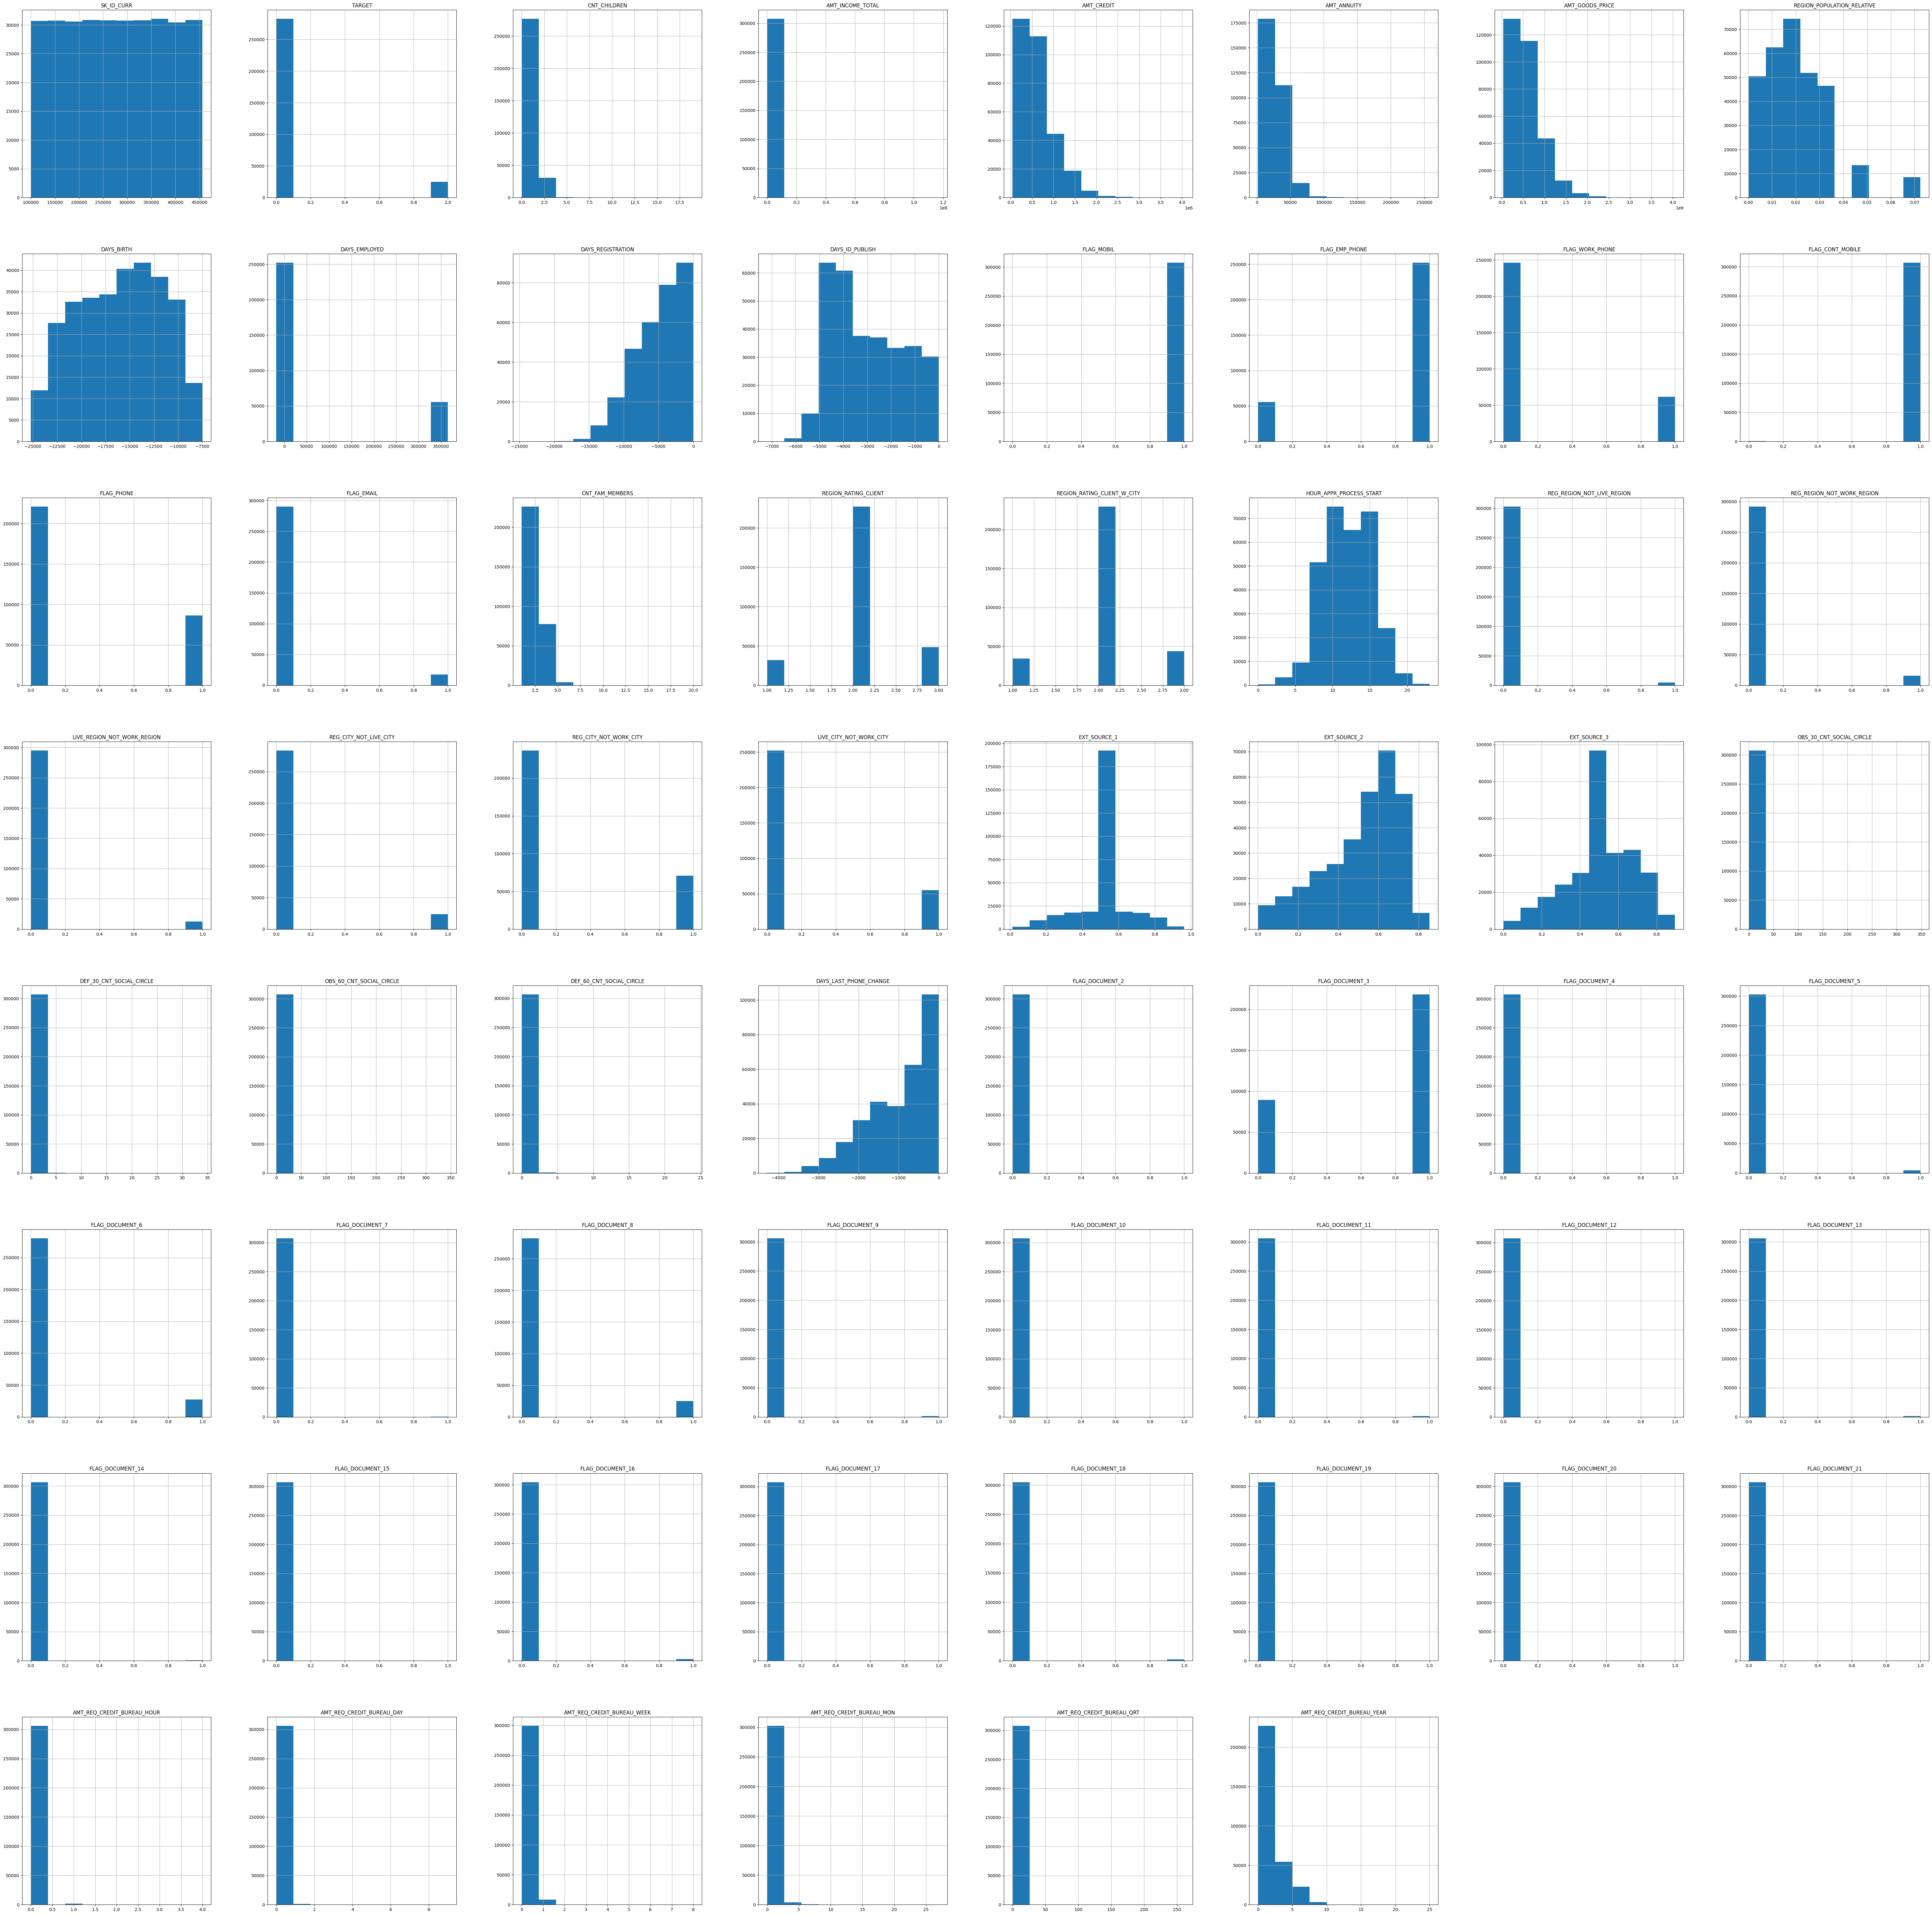

In [ ]:
# plotting a histogram for all predictors
application_train_clean.hist(figsize=(80,80))
plt.show()


The above plot shows that there are several columns with just 1 or 2 unique values and they are highly imbalanced. These low variability columns do not help the models in making predictions. Let's analyze these columns and then take a decision of dropping them.

###  **2.6 Treating Low Variability columns**

Few columns have a very large proportion of values having the same value. These columns do not help for model development as they dont offer any variability and can safely be removed. The basis of selecting the columns to remove is unique value count less than 3 and imbalance proportion greater than 0.98:



In [ ]:
selected_columns = []

# displaying columns along with a proportion of the unique values
for column in application_train_clean.columns:
    unique_values = application_train_clean[column].value_counts()
    total_count = len(application_train_clean)
    if len(unique_values) < 3: # Unique values less than 3 in a column
        proportions = unique_values / total_count
        if any(proportions > 0.98):  # Check if any proportion is above 0.98
            column_info = {
                "Column": column,
                "Proportions": proportions
            }
            selected_columns.append(column_info['Column'])
            # print(f"Column: {column}")
            # print("Proportions:")
            # print(proportions)
            # print("\n")

In [ ]:
len(selected_columns)

21

In [ ]:
# Dropping the selected columns with less variability
application_train_clean = application_train_clean.drop(columns=selected_columns, axis=1)
application_train_clean.shape

(307511, 57)

There were 21 columns with very low variability and these have been dropped. We are now left with 57 columns.

### **2.7 Treating Multicollinearity**

Lets have a threshold of 70% for classifying as multi-collinear.

In [ ]:
corr_matrix = application_train_clean.corr()
threshold = 0.7

# Find the pairs of variables with a correlation greater than the threshold
multicollinear_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            multicollinear_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

# Display the multicollinear pairs
print("Multicollinear Pairs:")
for pair in multicollinear_pairs:
  print(pair)

Multicollinear Pairs:
('CNT_CHILDREN', 'CNT_FAM_MEMBERS')
('AMT_CREDIT', 'AMT_ANNUITY')
('AMT_CREDIT', 'AMT_GOODS_PRICE')
('AMT_ANNUITY', 'AMT_GOODS_PRICE')
('DAYS_EMPLOYED', 'FLAG_EMP_PHONE')
('REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY')
('REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION')
('REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY')
('OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE')
('DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE')


In [ ]:
# Calculate the correlation of the multicollinear pairs with the 'TARGET' variable
correlation_with_target = {}
for pair in multicollinear_pairs:
    corr_column1 = application_train_clean[pair[0]].corr(application_train_clean['TARGET'])  # Calculate correlation with 'TARGET' for column 1
    corr_column2 = application_train_clean[pair[1]].corr(application_train_clean['TARGET'])  # Calculate correlation with 'TARGET' for column 2
    correlation_with_target[pair] = (corr_column1, corr_column2)

# Display the multicollinear pairs and their correlations with 'TARGET'
print("Multicollinear Pairs and Their Correlations with 'TARGET':")
for pair, corrs in correlation_with_target.items():
    print(f"Pair: {pair}, Correlation with 'TARGET' - Column 1: {corrs[0]:.2f}, Column 2: {corrs[1]:.2f}")

Multicollinear Pairs and Their Correlations with 'TARGET':
Pair: ('CNT_CHILDREN', 'CNT_FAM_MEMBERS'), Correlation with 'TARGET' - Column 1: 0.02, Column 2: 0.01
Pair: ('AMT_CREDIT', 'AMT_ANNUITY'), Correlation with 'TARGET' - Column 1: -0.03, Column 2: -0.01
Pair: ('AMT_CREDIT', 'AMT_GOODS_PRICE'), Correlation with 'TARGET' - Column 1: -0.03, Column 2: -0.04
Pair: ('AMT_ANNUITY', 'AMT_GOODS_PRICE'), Correlation with 'TARGET' - Column 1: -0.01, Column 2: -0.04
Pair: ('DAYS_EMPLOYED', 'FLAG_EMP_PHONE'), Correlation with 'TARGET' - Column 1: -0.04, Column 2: 0.05
Pair: ('REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'), Correlation with 'TARGET' - Column 1: 0.06, Column 2: 0.06
Pair: ('REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION'), Correlation with 'TARGET' - Column 1: 0.01, Column 2: 0.00
Pair: ('REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'), Correlation with 'TARGET' - Column 1: 0.05, Column 2: 0.03
Pair: ('OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE'),

The above output shows that these highly collinear column pairs have poor correlation with the target variable. But correlation of 0.03 can be considered for this dataset. Removing only columns with less than 0.03 but excluding 'CNT_FAM_MEMBERS', 'AMT_ANNUITY' as these appear very frequently in the credit risk domain.

In [ ]:
# Dropping multicollinear columns with correlation less than 0.03
drop_columns = ['CNT_CHILDREN', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION','OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE']

application_train_final = application_train_clean.drop(drop_columns, axis=1)
application_train_final.shape

#application_train_final.columns

(307511, 52)

## **2.8 EDA Summary** <a name="28"></a>

We observed that there are over a hundred columns in the application train dataset and hence Exploratory Data Analysis was necessary to trim down features, impute missing values, transform data all of which ensures good quality ML models. We have gained several insights on the dataset through EDA and below is a summary of it:

1. The majority class accuracy is 91.92%. This also will be the accuracy benchmark for the classification models.

2. Days birth are the most positively correlated while external sources 3,2 & 1 are the most negatively correlated features to the target variable.

3. Columns with missing values more than 48% were dropped except for external source 1 with the rest of values being imputed by either mode or median depending on the variable data type.

4. Through Univariate analysis, we identified 21 features that offer near to 0 variability and these were dropped.

5. Further 7 columns were dropped for causing multi-collinearity.

6. Through Bivariate analysis, we tested for various hypothesis and found that females have taken more loans and are double the number of defaulters when compared to men. We verified that laborers, drivers and sales staff all have higher percentage of loan defaults. Also, while large credit amount doesn't really mean higher chances of default while higher age certainly is a decent sign of a defaulter.


# **3. Data Preparation** <a name="3"></a>

## **3.1 Data Transformation - One Hot encoding** <a name="31"></a>

There are 16 categorical variables in the dataset that needs to be converted to numeric values to be able to apply most of the ML models. Using One Hot Encoding to encode these 16 predictors:

In [ ]:
#Get Dummies
application_train_final_bckup = application_train_final # storing the final application_train_final to a temp variable for backup
application_train_final = pd.get_dummies(application_train_final)



 We now have cleaned data with all the categorical variables converted to numeric. However, in order to be able to build high performance ML models:

1.   The dataset needs to be split into train and test sets to ensure that the model does not overfit the training data.
2. Few models need one hot encoding to convert categorical predictor variables into numeric.
3.   Appropriate features engineering has the capability to boost the model scores. Selecting features to modify depends on the domain knowledge.
4. Upon exploring the test set, certain column's categories were missing when compared to train set such as NAME_FAMILY_STATUS having a value of 'Unknown' and CODE_GENDER with a value of XNA, etc. This creates discrepancy between application train and application test datasets. Therefore, these values have been removed from the train set to maintain data consistency.
5. For models such as Logistic Regression and Neural Networks, scaling is required to normalize the values between 0 & 1 across all the predictors.
6. Models such as Light Gradient Boosting needs the input predictor names to not contain any special characters or spaces. We would need to standardize and make the variables names consistent.

In [ ]:
application_train_final = application_train_final.drop(columns=['SK_ID_CURR','NAME_FAMILY_STATUS_Unknown', 'NAME_INCOME_TYPE_Maternity leave','CODE_GENDER_XNA'], axis=1)

## **3.2 Feature Engineering**<a name="32"></a>


After having performed a detailed research on credit risk business operations and customer loan application evaluation, and and extensive trial and error, we have identified the below few features to be valuable to credit risk domain which have helped improve model AUC.

*   CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
*   ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
*   CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due)
*   DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age








---



In [ ]:
application_train_final['CREDIT_INCOME_PERCENT'] = application_train_final['AMT_CREDIT'] / application_train_final['AMT_INCOME_TOTAL']
application_train_final['ANNUITY_INCOME_PERCENT'] = application_train_final['AMT_ANNUITY'] / application_train_final['AMT_INCOME_TOTAL']
application_train_final['CREDIT_TERM'] = application_train_final['AMT_ANNUITY'] / application_train_final['AMT_CREDIT']
application_train_final['DAYS_EMPLOYED_PERCENT'] = application_train_final['DAYS_EMPLOYED'] / application_train_final['DAYS_BIRTH']

## **3.3 Data Split into Train & Test**<a name="33"></a>


The data was split into training and testing sets using the `train_test_split` function from scikit-learn with 80 and 20 % ratio

*   Training Set (X_train and y_train): This set will be used for training machine learning models and tuning hyperparameters.
*   Testing Set (X_test and y_test): This set will be reserved for evaluating the performance of our models. It helps us understand how well the model generalizes to new, unseen data.






In [ ]:
from sklearn.model_selection import train_test_split

# As descibed above cleaning the predictor names to not contain any special characters and spaces.

def clean_feature_names(df):
    df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True)  # Replace non-alphanumeric characters with underscores
    return df

application_train_final = clean_feature_names(application_train_final)

# Data Split
X = application_train_final.loc[:, application_train_final.columns != 'TARGET']
y = application_train_final['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (246008, 174)
y_train shape: (246008,)
X_test shape: (61503, 174)
y_test shape: (61503,)


## **3.4 Feature Scaling**<a name="34"></a>

In the below step, we did Feature scaling('Min-Max scaling') to transform and rescale our features to ensure that they all fall within a similar range [0-1], to prevent certain features from dominating others, i.e each feature has equal influence on the model during model training






In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation or test data using the same scaler
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
X_test_scaled.shape

(246008, 174)


(61503, 174)

We have used 'norm' function for feature normalization with both StandardScaler and MinMaxScaler. It helps to select the desired normalization method based on the 'norm' parameter.

*   If 'norm' is set to 1, StandardScaler is used. StandardScaler scales features to have a mean of 0 and a standard deviation of 1.
*   If 'norm' is set to 0, MinMaxScaler is used. MinMaxScaler scales features to fall within the [0, 1] range.









In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def norm (norm, train):
  if norm ==1:
    scale = StandardScaler()

  else:
    scale = MinMaxScaler()

  norm = scale.fit_transform(train)
  return norm

train_norm = norm(1, X_train)
test_norm = norm(1, X_test)


# **4. Modeling** <a name="4"></a>

In the modeling phase of our project, we employ a range of machine learning techniques to predict home loan default risk accurately and efficiently. The models selected for this task include logistic regression, XGBoost, LightGBM, Neural Net and Random Forest. Each model is configured with optimized hyperparameters to maximize predictive performance.

- **Logistic Regression**: We have chosen logistic regression as one of the models for this task due to its simplicity and interpretability. It is employed when the dependent variable is categorical, representing two classes (binary classification) or more(multinomial classification).Logistic Regression models the probability that a given instance belongs to a particular class i.e, It serves as a fundamental baseline model to assess the predictive performance in predicting home loan defaults.

- **Random Forest**:  Random Forest is a machine learning model that combines multiple decision trees to make predictions. It takes a majority vote from the predictions of individual decision trees to improve accuracy and reduce overfitting.

- **XGBoost**: XGBoost is chosen for its predictive accuracy, ability to capture complex non-linear relationships in the data, preventing overfitting, and feature importance analysis.


- **Neural Net**: We have chosen neural network modeling for its ability to excel in complex pattern recognition and its capacity to capture non-linear relationships within data. We did data preprocessing, normalized and extracted better features, followed by the design and training of neural network architectures. We determined the network's structure, including the number of layers, neurons, and activation functions.Regularization techniques, such as dropout and batch normalization, help prevent overfitting.

- **Light GBM**: For large and complex datasets like home-credit, LightGBM model predicts classification and regression with impressive speed and competitive predictive accuracy.LightGBM's leaf-wise tree growth strategy accelerates training by focusing on the most informative leaves optimizing model efficiency and accuracy.


To assess the model's predictive performance, we calculate two key metrics:
- **AUC (Area Under the Receiver Operating Characteristic Curve)**: The AUC score provides an indication of the model's ability to discriminate between positive and negative cases.
- **Accuracy**: Accuracy measures the proportion of correctly predicted outcomes in the test data.

Although we will be displaying accuracy for the tuned models just to verify that the accuracy is close to the majority class accuracy, the final best model will be selected based on the highest AUC and Kaggle score.


## **4.1 Logistic Regression** <a name="41"></a>

Logistic Regression ML method is senstive to unscaled data and class imbalance. Lets call the norm function to scale the numeric variables and use class_weight 'balanced' as a parameter.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score

# Logistic Regression model
logistic_regression = LogisticRegression(max_iter = 100,random_state=42, class_weight = 'balanced')

# Fit the model on the scaled training data
logistic_regression.fit(train_norm, y_train)

y_train_pred = logistic_regression.predict(train_norm)
# Predict on the scaled test data
y_pred = logistic_regression.predict(test_norm)

# AUC & Accuracy
lg_roc_auc_train = roc_auc_score(y_train, y_train_pred)
lg_roc_auc_test = roc_auc_score(y_test, y_pred)
lg_accuracy = accuracy_score(y_test, y_pred)

print("Logistic Regression Train AUC:", lg_roc_auc_train)
print("Logistic Regression Test AUC:",lg_roc_auc_test)
print("Logistic Regression Accuracy:",lg_accuracy)

Logistic Regression Train AUC: 0.6852469621703561
Logistic Regression Test AUC: 0.6828550657953121
Logistic Regression Accuracy: 0.6883566655285108


AUC & accuracy scores of 0.68 explains that the model can make some distinctions, but it's not very reliable at classifying non loan default from those of repayment difficulties.

## **4.2 Random Forest** <a name="42"></a>

Random Forest being a tree based model, does not require feature scaling and can even handle multi-coollinear variables. Let's run a grid search to identify the best set of hyperparameters for the best AUC score.

### **Random Forest Tuning through Cross Validation/Grid Search**

**Cross-Validation :** It is a resampling technique that provides a robust assessment of a model's performance. It provides a better understanding of a model's generalization and helps identify issues like overfitting and underfitting.

For cross-validation we used k-fold cross-validation technique where the dataset(application_train) is divided into k equal-sized subsets or folds (k=3 in our case). The model is trained and evaluated K times, with each folding serving as the validation set once, and the remaining folds used for training. This process provides K different esimates of the model's performance, which are typically averaged to obtain a more reliable assessment.

**Tuning :**  For hyperparameter tuning, we used Grid search as it is effective in finding the best hyperparameters and also validate for any over-fitting. Here we defined a range of values for each hyperparameter of interest and using AUC score as the selection metric. Grid search then explores all the possible combinations provided. We can then call the *best_params_* method to obtain the set of hyperparameters with the highest AUC score.

In [ ]:
#
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# rf = RandomForestClassifier()
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
#                            cv=3, n_jobs=-1, verbose=2, scoring='roc_auc')
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# print("Best parameters found: ", best_params)
#

**Note:** CV and Grid Search ran on local machine.<br><br>
Best Params Results:<br>
max_depth = 20<br>
max_features = 'sqrt'<br>
min_samples_leaf = 4<br>
min_samples_split = 5<br>
n_estimators = 200<br>

### **Tuned Random Forrest**





Applying the set of best parameters obtained by tuning to make final predictions:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

#APLLYING BEST PARAMETERS
rf_model = RandomForestClassifier(max_depth = 20,
                            max_features = 'sqrt',
                            min_samples_leaf = 4,
                            min_samples_split = 5,
                            n_estimators = 200)
rf_model.fit(X_train, y_train)

# Predict probabilities for both training and test sets
y_train_pred_prob = rf_model.predict_proba(X_train)[:, 1]
rf_y_final = rf_model.predict_proba(X_test)[:, 1]
y_test_pred = rf_model.predict(X_test)

# Calculate ROC AUC for the training set
rf_roc_auc_train = roc_auc_score(y_train, y_train_pred_prob)

# Calculate AUC & Accuracy for the test set
rf_roc_auc = roc_auc_score(y_test, rf_y_final)
rf_accuracy = accuracy_score(y_test, y_test_pred)


# Print the AUC & Accuracy scores
print("Tuned Random Forrest ROC AUC (Training):", rf_roc_auc_train)
print("Tuned Random Forrest ROC AUC (Test):", rf_roc_auc)
print("Tuned Random Forrest Accuracy:", rf_accuracy)

Tuned Random Forrest ROC AUC (Training): 0.977496531998114
Tuned Random Forrest ROC AUC (Test): 0.7479725209014395
Tuned Random Forrest Accuracy: 0.9195811586426679


This tuned Random Forest scored 0.747 on kaggle which showed better performance than the logistic regresion model. Accuracy and AUc shows high potential on the Training data but not as high as on the Test data.

Test accuracy score of 0.9195 explains that the model is able to correctly predict in approximately 91.95% of the cases.

## **4.3 XGBoost** <a name="43"></a>

XGboost also being a tree based model, does not require feature scaling and can even handle multi-coollinear variables. Let's run a grid search to identify the best set of hyperparameters for the best AUC score.

### **XGBoost Tuning through Cross Validation/Grid Search**

In [ ]:

# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import accuracy_score

# #Cross Validation with XGBoost
# xgb_model = XGBClassifier()
# #cross_val_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
# #print("Mean CV Accuracy:", cross_val_scores.mean())

# #Hyperparameter Tuning with GridSearchCV
# param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],
#     'subsample': [0.8, 0.9, 1],
#     'colsample_bytree': [0.8, 0.9, 1]
# }

# #Cross-Validation with XGBoost
# grid_search = GridSearchCV(xgb_model, param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
# grid_search.fit(X_train_resampled, y_train_resampled)

# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)


**Note:** CV and Grid Search ran on local machine.<br><br>
Best Params Results:<br>
colsample_bytree = 0.9<br>
learning_rate = 0.1<br>
max_depth = 5<br>
n_estimators = 200<br>
subsample = 1<br>

### **Tuned XGBOOST Model**

Applying the set of best parameters obtained by tuning to make final predictions:

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

# XGBoost classifier Initializing with the specified parameters
xgb_model = XGBClassifier(colsample_bytree = 0.9,
                          learning_rate = 0.1,
                          max_depth = 5,
                          n_estimators = 200,
                          subsample = 1)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

y_train_pred_prob = xgb_model.predict_proba(X_train)[:, 1]

# Make predictions on the test set
xgb_y_pred = xgb_model.predict_proba(X_test)[:, 1]  # Use predict_proba to get probability scores for the positive class
y_pred = xgb_model.predict(X_test)

xgb_train_roc_auc = roc_auc_score(y_train, y_train_pred_prob)

# Calculate the ROC-AUC score on the test set
xgb_roc_auc = roc_auc_score(y_test, xgb_y_pred)
xgb_accuracy = accuracy_score(y_test, y_pred)

# AUC & Accuracy
print(f'Tuned XGB Train ROC-AUC Score: {xgb_train_roc_auc}')
print(f'Tuned XGB Test ROC-AUC Score: {xgb_roc_auc}')
print(f'Tuned XGB Accuracy Score: {xgb_accuracy}')

Tuned XGB Train ROC-AUC Score: 0.8088339563366922
Tuned XGB Test ROC-AUC Score: 0.7683351584471186
Tuned XGB Accuracy Score: 0.9201014584654407


This tuned XGB model scored 0.758 on Kaggle which is the highest so far we gotten in unsampled data. It is most likely will be the chosen model solution but will have to explore more on some sampling datasets. XGBoost is considered blackbox model but with some other packages we can explore the predictors which will be shown and discussed later in the notebook.

## **4.4 Neural Network** <a name="44"></a>

Neural Networks are great at learning nuances in data and is highly customizable meaning we can run tuning mechanisms to identify the best loss optimizer, number of hidden layers and even number of neurons in each layer. The dataset being large, tuning of the neural nets will consume quiet a significant amount of time on the local machines.

**Neural Net Tuning for Best Optimizer**

In [ ]:
#
# from keras.api._v2.keras.layers import Dense
# from keras.src import Sequential
# import tensorflow as tf
# from tensorflow import keras
# import kerastuner as kt

# def build_model(hp):
#   model = Sequential()

#   model.add(Dense(units=174, activation='relu', input_shape=(174,)),)
#   model.add(Dense(units=87, activation='relu')),
#   model.add(Dense(units=1, activation='sigmoid'))
#   optimizer = hp.Choice('optimizer', values = ['adam', 'rmsprop', 'adadelta'])
#   model.compile(optimizer =optimizer, loss = 'binary_crossentropy', metrics = [tf.keras.metrics.AUC()])

#   return model

# tuner1 = kt.RandomSearch(
#     build_model,
#     objective = kt.Objective("auc", direction="max"),
#     max_trials=150)

# tuner1.search(train_norm, y_train, epochs=10, validation_data = (test_norm, y_test))
# tuner.get_best_hyperparameters()[0].values

Recieved best optimizer as adam

**Neural Net Tuning for Number of Neuron Units**

In [ ]:
# def build_model(hp):
#   model = Sequential()

#   units = hp.Int('units', min_value = 174, max_value = 360, step = 10)

#   model.add(Dense(units=units, activation='relu', input_shape=(174,)))
#   model.add(Dense(units=units, activation='relu'))
#   model.add(Dense(units=1, activation='sigmoid'))

#   model.compile(optimizer='adam', loss='binary_crossentropy', metrics = [tf.keras.metrics.AUC()])
#   return model

# tuner = kt.RandomSearch(build_model,
#                         objective = kt.Objective("auc", direction="max"),
#                         max_trials = 100)

# tuner.search(train_norm, y_train, epochs=5, validation_data = (test_norm, y_test))
# tuner.get_best_hyperparameters()[0].values

Received best number of neuron units as 348 for the 1st layer

 **Neural Net Tuning for Best Number of Layers**

In [ ]:

# from keras.api._v2.keras.layers import Dense
# from keras.src import Sequential
# import tensorflow as tf
# from tensorflow import keras
# import kerastuner as kt


# def build_model(hp):
#   model = Sequential()

#   model.add(Dense(units=348, activation='relu', input_shape=(174,)))

#   for i in range(hp.Int('num_layers', min_value = 1, max_value = 10)):

#   model.add(Dense(units=1, activation='sigmoid'))

#   model.compile(optimizer = 'adam', loss= 'binary_crossentropy')

#   return model

# tuner = kt.RandomSearch(build_model,
#                         objective = kt.Objective("auc", direction="max"),
#                         max_trials = 5)

# tuner.search(train_norm, y_train, epochs=5, validation_data = (test_norm, y_test))
# tuner.get_best_hyperparameters()[0].values

Received best number of layers as 3.

### **Tuned Neural Network**

Developing the tuned neural net with the obtained best set of hyperparameters and with 5 epochs and mini batch configuration with the batch size of 16. For every epoch let's display validation set AUC score as well to identify any signs of overfitting.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import roc_auc_score

# Define the neural network
neural_model = keras.Sequential([
    keras.layers.Dense(units=348, activation='relu', input_shape=(174,)),
    keras.layers.Dense(units=174, activation='relu'),
    keras.layers.Dense(units=87, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid') ])

# Compile the model using AUC as the selection metric
neural_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

# Train the model
neural_model.fit(train_norm, y_train, epochs=5, batch_size=16, validation_data=(test_norm, y_test))

# Make predictions on the test data
y_pred = neural_model.predict(test_norm)

# Calculate AUC & Accuracy score
nn_roc_auc = roc_auc_score(y_test, y_pred)
# accuracy = accuracy_score(y_test, y_pred)

print(f'Neural Net ROC AUC Score: {nn_roc_auc:.4f}')
#print(f'Neural Net Accuracy Score: {accuracy}')

Epoch 1/5
15376/15376 [==============================] - 74s 5ms/step - loss: 0.2579 - auc: 0.7212 - val_loss: 0.2532 - val_auc: 0.7378
Epoch 2/5
15376/15376 [==============================] - 77s 5ms/step - loss: 0.2515 - auc: 0.7416 - val_loss: 0.2533 - val_auc: 0.7400
Epoch 3/5
15376/15376 [==============================] - 73s 5ms/step - loss: 0.2496 - auc: 0.7473 - val_loss: 0.2517 - val_auc: 0.7422
Epoch 4/5
15376/15376 [==============================] - 76s 5ms/step - loss: 0.2479 - auc: 0.7523 - val_loss: 0.2532 - val_auc: 0.7411
Epoch 5/5
1922/1922 [==============================] - 5s 2ms/step
Neural Net ROC AUC Score: 0.7410


This tuned Neural Network scored 0.734 on Kaggle which is not bad at all. However, Neural Net Tuning by far was the most time consuming to run. and often crashed the limited RAM in the free version of Google Colab and hence, for the scope of this project, we will not be considering Neural Netorks anymore (for sampling techniques).

## **4.5 Light Gradient Boosting** <a name="45"></a>

Light Gradient Boosting is a lighter version of XGBoost and is faster and efficient. LGB requires the input predictors names to be cleaned and without spaces. This method is also tree based and does not require feature scaling.
Lets tune the LGB model:

**LGBM Tuning through Cross Validation/Grid Search**

In [ ]:

# import lightgbm as lgb
# import numpy as np
# from sklearn.metrics import accuracy_score, roc_auc_score
# from sklearn.model_selection import GridSearchCV, StratifiedKFold

# # Assuming you have cleaned feature names and have X_train, X_test, y_train, and y_test ready

# # Create a LightGBM classifier
# clf = lgb.LGBMClassifier(n_jobs=-1)

# # Define the hyperparameter grid for grid search
# param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],
#     'subsample': [0.8, 0.9, 1],
#     'colsample_bytree': [0.8, 0.9, 1]
# }

# # Create a StratifiedKFold cross-validator for better handling of imbalanced datasets
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Perform grid search using cross-validation
# grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

# # Fit the model with the best parameters
# grid_search.fit(X_train, y_train)

# # Get the best estimator (model) with the optimal hyperparameters
# best_clf = grid_search.best_estimator_

# # Make predictions on the test set
# y_pred = best_clf.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)

# # Calculate AUC
# auc = roc_auc_score(y_test, y_pred)

# print(f"Best Hyperparameters: {grid_search.best_params_}")
# print(f"Accuracy: {accuracy:.2f}")
# print(f"AUC: {auc:.2f}")


Best parameters obtained: colsample_bytree=0.8, learning_rate=0.05, max_depth=8, n_estimators=500 and subsample=0.9

### **Tuned LGBM**

In [ ]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, accuracy_score
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Create a LightGBM classifier with the specified hyperparameters
lgb_model = lgb.LGBMClassifier(colsample_bytree=0.8,
                              learning_rate=0.05,  # Reduced learning rate
                              max_depth=8,
                              n_estimators=500,
                              subsample=0.9)

def clean_feature_names(df):
    df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '_', regex=True)  # Replace non-alphanumeric characters with underscores
    return df

# Apply the cleaning function to your dataframes
X_train = clean_feature_names(X_train)
X_test = clean_feature_names(X_test)

# Fit the model to the training data
lgb_model.fit(X_train, y_train)
lgb_train_y_pred = lgb_model.predict_proba(X_train)[:, 1]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19876, number of negative: 226132
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.157207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4472
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 172
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080794 -> initscore=-2.431606
[LightGBM] [Info] Start training from score -2.431606
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [ ]:
lgb_train_y_pred = lgb_model.predict_proba(X_train)[:, 1]
# Make predictions on the test set
lgb_y_pred = lgb_model.predict_proba(X_test)[:, 1]  # Use predict_proba to get probability scores for the positive class
y_pred = lgb_model.predict(X_test)

lgb_train_roc_auc = roc_auc_score(y_train, lgb_train_y_pred)

# Calculate the ROC-AUC score on the test set
lgb_roc_auc = roc_auc_score(y_test, lgb_y_pred)
lgb_accuracy = accuracy_score(y_test, y_pred)

# AUC & Accuracy
print(f'Tuned LightGBM Train ROC-AUC Score: {lgb_train_roc_auc:.2f}')
print(f'Tuned LightGBM Test ROC-AUC Score: {lgb_roc_auc:.2f}')
print(f'Tuned LightGBM Accuracy Score: {lgb_accuracy:.2f}')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Tuned LightGBM Train ROC-AUC Score: 0.84
Tuned LightGBM Test ROC-AUC Score: 0.77
Tuned LightGBM Accuracy Score: 0.92


## **4.6 ROC-AUC Curve** <a name="46"></a>

ROC-AUC curve is used to evaluate and visualize the trade-offs between the model's true positive rate (sensitivity) and its false positive rate (1-specificity) at different classification thresholds.

An ideal classifier would have a ROC curve that reaches the top-left corner, indicating high sensitivity and low false positive rate across all threshold values.

Below is the plot summarizing the ROC curve along with the AUC score for all the models.

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


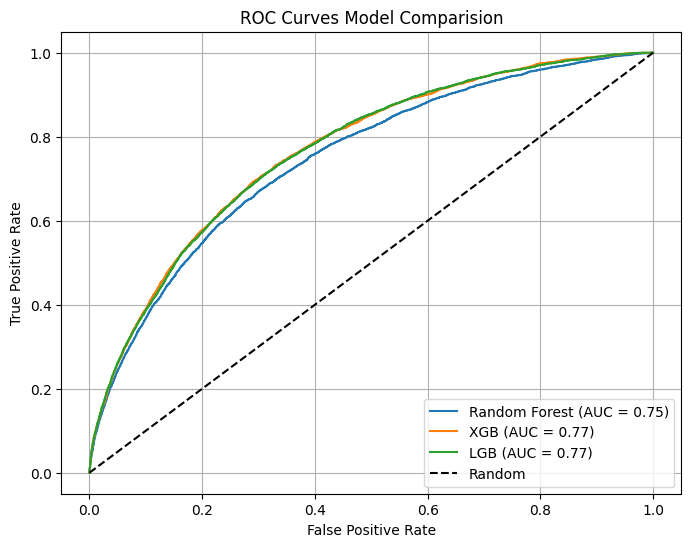

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

X = application_train_final.loc[:, application_train_final.columns != 'TARGET']
y = application_train_final['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a list of models and their corresponding labels (Team: add all your models here)
models = [(rf_model, "Random Forest"), (xgb_model, "XGB"),  (lgb_model,"LGB") ]
plt.figure(figsize=(8, 6))

# Plot ROC curves for all models
for model, label in models:
  y_prob = model.predict_proba(X_test)[:, 1]
  fpr, tpr, _ = roc_curve(y_test, y_prob)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')



# Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--', label="Random")

# Customize the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Model Comparision")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


We observe similar ROC-AUC score and pattern for XGB, LGB and Random Forest models.

## **4.7 Sampling Techniques** <a name="47"></a>

Since we have Class Imbalance i.e where the distribution of classes or categories is significantly skewed( 'TARGET' is imbalanced, one class greatly outnumbering the other- loan defaults).

Imbalance datasets can hinder the performance of machine learning, particularly in situations where the minority class is of great importance, loan default(0) is our case.

To handle imbalanced datasets, we are using data resampling techniques such as Down Sampling & SMOTE. These techniques modifies he existing dataset either by increasing or decreasing the number of data points.


### **Random Down Sampling**

Down sampling/Random Undersampling randomly removes instances from the majority class to match the number of instances in the minority class. It may result in information loss if too many instances are removed. After trial and error, we were achieving highest AUC scores with down sampling the majority class by 40%.

In [ ]:
# Class count
count_class_0, count_class_1 = application_train_final.TARGET.value_counts()

# Divide by class
df_class_0 = application_train_final[application_train_final['TARGET'] == 0]
df_class_1 = application_train_final[application_train_final['TARGET'] == 1]


df_class_0_under = df_class_0.sample(round(count_class_0*0.4))
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.TARGET.value_counts())

df_test_under.TARGET.value_counts(normalize=True)

Random under-sampling:
0    113074
1     24825
Name: TARGET, dtype: int64


0    0.819977
1    0.180023
Name: TARGET, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X = df_test_under.loc[:, df_test_under.columns != 'TARGET']
y = df_test_under['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (110319, 174)
y_train shape: (110319,)
X_test shape: (27580, 174)
y_test shape: (27580,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc


#Logistic Regression
logistic_regression_down_samp = LogisticRegression(random_state=42)
logistic_regression_down_samp.fit(X_train, y_train)


#RF Base Model
rf_model_down_samp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_down_samp.fit(X_train, y_train)

#RF Tuned Model
rf_model_tuned_down_samp = RandomForestClassifier(max_depth = 20,
                            max_features = 'sqrt',
                            min_samples_leaf = 4,
                            min_samples_split = 5,
                            n_estimators = 200)
rf_model_tuned_down_samp.fit(X_train, y_train)

#XGB Base Model
xgb_model_down_samp = XGBClassifier()
xgb_model_down_samp.fit(X_train, y_train)


#XGB Tuned Model
xgb_model_tuned_down_samp = XGBClassifier(colsample_bytree = 0.9,
                          learning_rate = 0.1,
                          max_depth = 5,
                          n_estimators = 200,
                          subsample = 1)
xgb_model_tuned_down_samp.fit(X_train, y_train)

# lgb Base Model
lgb_model_down_samp = lgb.LGBMClassifier()
lgb_model_down_samp.fit(X_train, y_train)

# lgb Tuned Model
lgb_model_tuned_down_samp = lgb.LGBMClassifier(colsample_bytree=0.8,
                              learning_rate=0.05,  # Reduced learning rate
                              max_depth=8,
                              n_estimators=500,
                              subsample=0.9)
lgb_model_tuned_down_samp.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 19810, number of negative: 90509
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4445
[LightGBM] [Info] Number of data points in the train set: 110319, number of used features: 168
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.179570 -> initscore=-1.519262
[LightGBM] [Info] Start training from score -1.519262
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19810, number of negative: 90509
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.071862 seconds.
You c

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, max_depth=8,
               n_estimators=500, subsample=0.9)

In [ ]:
print("Down Sampling Model Score Summary:")

y_pred_down_samp = logistic_regression_down_samp.predict_proba(X_test)[:, 1]
y_pred_d_s = logistic_regression_down_samp.predict(X_test)
lg_down_roc_auc = roc_auc_score(y_test, y_pred_down_samp)
lg_down_accuracy = accuracy_score(y_test, y_pred_d_s)
print("Logistic Regression - Test ROC AUC Score:", lg_down_roc_auc)
print("Logistic Regression - Test Accuracy Score:", lg_down_accuracy)

y_pred_down_samp = rf_model_down_samp.predict_proba(X_test)[:, 1]
y_pred_d_s = rf_model_down_samp.predict(X_test)
rf_down_roc_auc = roc_auc_score(y_test, y_pred_down_samp)
rf_down_accuracy = accuracy_score(y_test, y_pred_d_s)
print("Random Forest - Test ROC AUC Score:", rf_down_roc_auc)
print("Random Forest - Test Accuracy Score:", rf_down_accuracy)

y_pred_down_samp = rf_model_tuned_down_samp.predict_proba(X_test)[:, 1]
y_pred_d_s = rf_model_tuned_down_samp.predict(X_test)
rf_tuned_down_roc_auc = roc_auc_score(y_test, y_pred_down_samp)
rf_tuned_down_accuracy = accuracy_score(y_test, y_pred_d_s)
print("Tuned Random Forest - Test ROC AUC Score:", rf_tuned_down_roc_auc)
print("Tuned Random Forest - Test Accuracy Score:", rf_tuned_down_accuracy)

y_pred_down_samp = xgb_model_down_samp.predict_proba(X_test)[:, 1]
y_pred_d_s = xgb_model_down_samp.predict(X_test)
xg_down_roc_auc = roc_auc_score(y_test, y_pred_down_samp)
xg_down_accuracy = accuracy_score(y_test, y_pred_d_s)
print("XGBoost - Test ROC AUC Score:", xg_down_roc_auc)
print("XGBoost - Test Accuracy Score:", xg_down_accuracy)

y_pred_down_samp = xgb_model_tuned_down_samp.predict_proba(X_test)[:, 1]
y_pred_d_s = xgb_model_tuned_down_samp.predict(X_test)
xg_tuned_down_roc_auc = roc_auc_score(y_test, y_pred_down_samp)
xg_tuned_down_accuracy = accuracy_score(y_test, y_pred_d_s)
print("Tuned XGBoost - Test ROC AUC Score:", xg_tuned_down_roc_auc)
print("Tuned XGBoost - Test Accuracy Score:", xg_tuned_down_accuracy)

y_pred_down_samp = lgb_model_down_samp.predict_proba(X_test)[:, 1]
y_pred_d_s = lgb_model_down_samp.predict(X_test)
lgb_down_roc_auc = roc_auc_score(y_test, y_pred_down_samp)
lgb_down_accuracy = accuracy_score(y_test, y_pred_d_s)
print("Light GBM - Test ROC AUC Score:", lgb_down_roc_auc)
print("Light GBM - Test Accuracy Score:", lgb_down_accuracy)

y_pred_down_samp = lgb_model_tuned_down_samp.predict_proba(X_test)[:, 1]
y_pred_d_s = lgb_model_tuned_down_samp.predict(X_test)
lgb_tuned_down_roc_auc = roc_auc_score(y_test, y_pred_down_samp)
lgb_tuned_down_accuracy = accuracy_score(y_test, y_pred_d_s)
print("Tuned Light GBM - Test ROC AUC Score:", lgb_tuned_down_roc_auc)
print("Tuned Light GBM - Test Accuracy Score:", lgb_tuned_down_accuracy)


Down Sampling Model Score Summary:
Logistic Regression - Test ROC AUC Score: 0.6184710040054886
Logistic Regression - Test Accuracy Score: 0.8182015953589558
Random Forest - Test ROC AUC Score: 0.7355242979238663
Random Forest - Test Accuracy Score: 0.8242567077592459
Tuned Random Forest - Test ROC AUC Score: 0.749168660647793
Tuned Random Forest - Test Accuracy Score: 0.8222625090645396
XGBoost - Test ROC AUC Score: 0.7581698600188796
XGBoost - Test Accuracy Score: 0.8251994198694707
Tuned XGBoost - Test ROC AUC Score: 0.7680117679313048
Tuned XGBoost - Test Accuracy Score: 0.8280638143582306
Light GBM - Test ROC AUC Score: 0.7662092384490667
Light GBM - Test Accuracy Score: 0.8286802030456852
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Tuned Light GBM - Test ROC AUC Score

### **SMOTE SAMPLING** <a name="48"></a>


Smote (Synthetic Minority Over Sampling Technique) generates synthetic samples for the minority class by interpolating between existing instances. It creates new data points that are combinations of neighbouring data points in feature space.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy= 'auto', random_state=42, k_neighbors=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)

print(X_train_resampled.shape)

print(y_train_resampled.shape)

(226148, 174)
(226148,)


In [ ]:
X_test.shape

(27580, 174)

In [ ]:
# SMOTE sampled data model devlopment

#Logistic Regression
logistic_regression_smote = LogisticRegression(random_state=42)
logistic_regression_smote.fit(X_train_resampled, y_train_resampled)


#RF Base Model
rf_model_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_smote.fit(X_train_resampled, y_train_resampled)

#RF Tuned Model
rf_model_tuned_smote = RandomForestClassifier(max_depth = 20,
                            max_features = 'sqrt',
                            min_samples_leaf = 4,
                            min_samples_split = 5,
                            n_estimators = 200)
rf_model_tuned_smote.fit(X_train_resampled, y_train_resampled)

#XGB Base Model
xgb_model_smote = XGBClassifier()
xgb_model_smote.fit(X_train_resampled, y_train_resampled)


#XGB Tuned Model
xgb_model_tuned_smote = XGBClassifier(colsample_bytree = 0.9,
                          learning_rate = 0.1,
                          max_depth = 5,
                          n_estimators = 200,
                          subsample = 1)
xgb_model_tuned_smote.fit(X_train_resampled, y_train_resampled)


# lgb Base Model
lgb_model_smote = lgb.LGBMClassifier()
lgb_model_smote.fit(X_train_resampled, y_train_resampled)

# lgb Tuned Model
lgb_model_tuned_smote = lgb.LGBMClassifier(colsample_bytree=0.8,
                              learning_rate=0.05,
                              max_depth=8,
                              n_estimators=500,
                              subsample=0.9)
lgb_model_tuned_smote.fit(X_train_resampled, y_train_resampled)

[LightGBM] [Info] Number of positive: 113074, number of negative: 113074
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.169167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6906
[LightGBM] [Info] Number of data points in the train set: 226148, number of used features: 170
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 113074, number of negative: 113074
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.112612 seconds.
You can set `force_row_wise=true` to remove the overhead

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, max_depth=8,
               n_estimators=500, subsample=0.9)

In [ ]:
print("SMOTE Sampling Model Score Summary:")

y_pred_smote = logistic_regression_smote.predict_proba(X_test)[:, 1]
y_pred_s = logistic_regression_smote.predict(X_test)
lg_smote_roc_auc = roc_auc_score(y_test, y_pred_smote)
lg_smote_accuracy = accuracy_score(y_test, y_pred_s)
print("Logistic Regression - Test ROC AUC Score:", lg_smote_roc_auc)
print("Logistic Regression - Test Accuracy Score:", lg_smote_accuracy)

y_pred_smote = rf_model_smote.predict_proba(X_test)[:, 1]
y_pred_s = rf_model_smote.predict(X_test)
rf_smote_roc_auc = roc_auc_score(y_test, y_pred_smote)
rf_smote_accuracy = accuracy_score(y_test, y_pred_s)
print("Random Forest  - Test ROC AUC Score:", rf_smote_roc_auc)
print("Random Forest  - Test Accuracy Score:", rf_smote_accuracy)

y_pred_smote = rf_model_tuned_smote.predict_proba(X_test)[:, 1]
y_pred_s = rf_model_tuned_smote.predict(X_test)
rf_tuned_smote_roc_auc = roc_auc_score(y_test, y_pred_smote)
rf_tuned_smote_accuracy = accuracy_score(y_test, y_pred_s)
print("Tuned Random Forest  - Test ROC AUC Score:", rf_tuned_smote_roc_auc)
print("Tuned Random Forest  - Test Accuracy Score:", rf_tuned_smote_accuracy)

y_pred_smote = xgb_model_smote.predict_proba(X_test)[:, 1]
y_pred_s = xgb_model_smote.predict(X_test)
xg_smote_roc_auc = roc_auc_score(y_test, y_pred_smote)
xg_smote_accuracy = accuracy_score(y_test, y_pred_s)
print("XGBoost - Test ROC AUC Score:", xg_smote_roc_auc)
print("XGBoost - Test Accuracy Score:", xg_smote_accuracy)

y_pred_smote = xgb_model_tuned_smote.predict_proba(X_test)[:, 1]
y_pred_s = xgb_model_tuned_smote.predict(X_test)
xg_tuned_smote_roc_auc = roc_auc_score(y_test, y_pred_smote)
xg_tuned_smote_accuracy = accuracy_score(y_test, y_pred_s)
print("Tuned XGBoost - Test ROC AUC Score:", xg_tuned_smote_roc_auc)
print("Tuned XGBoost - Test Accuracy Score:", xg_tuned_smote_accuracy)

y_pred_smote = lgb_model_smote.predict_proba(X_test)[:, 1]
y_pred_s = lgb_model_smote.predict(X_test)
lgb_smote_roc_auc = roc_auc_score(y_test, y_pred_smote)
lgb_smote_accuracy = accuracy_score(y_test, y_pred_s)
print("Light GBM - Test ROC AUC Score:", lgb_smote_roc_auc)
print("Light GBM - Test Accuracy Score:", lgb_smote_accuracy)

y_pred_smote = lgb_model_tuned_smote.predict_proba(X_test)[:, 1]
y_pred_s = lgb_model_tuned_smote.predict(X_test)
lgb_tuned_smote_roc_auc = roc_auc_score(y_test, y_pred_smote)
lgb_tuned_smote_accuracy = accuracy_score(y_test, y_pred_s)
print("Tuned Light GBM - Test ROC AUC Score:", lgb_tuned_smote_roc_auc)
print("Tuned Light GBM - Test Accuracy Score:", lgb_tuned_smote_accuracy)

SMOTE Sampling Model Score Summary:
Logistic Regression - Test ROC AUC Score: 0.601218953376962
Logistic Regression - Test Accuracy Score: 0.6017041334300217
Random Forest  - Test ROC AUC Score: 1.0
Random Forest  - Test Accuracy Score: 1.0
Tuned Random Forest  - Test ROC AUC Score: 0.9683899420727403
Tuned Random Forest  - Test Accuracy Score: 0.8808556925308194
XGBoost - Test ROC AUC Score: 0.8431363520782655
XGBoost - Test Accuracy Score: 0.8491298042059463
Tuned XGBoost - Test ROC AUC Score: 0.7926210113289645
Tuned XGBoost - Test Accuracy Score: 0.8353879622915156
Light GBM - Test ROC AUC Score: 0.7850561853106757
Light GBM - Test Accuracy Score: 0.8316171138506164
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Tuned Light GBM - Test ROC AUC Score: 0.8216534177657588
Tune

## **4.9 Explainable Model Predictions** <a name="49"></a>

The use of black box models such as Random Forest, Boosting methods and Neural Networks although increases prediction accuracy, however practical applications for instance in prediciton loan defaults for new credit applications raises concerns over model fairness and the need of it's basis for judgement. Any bias identified in the historical data would be carry forwarded posing a serious risk of model learning this unintended cognitive biases or real-life prejudices leading to rejecting deserving credit applications. Hence, it is important for us to not only interpret the model results but also be able to explain the reason for the model making a particular decision.

Feature Importance method of models allows us to glance the most influential predictor variables on the target variable. Let's look at the top 20 predictors:

### **Feature Importance**

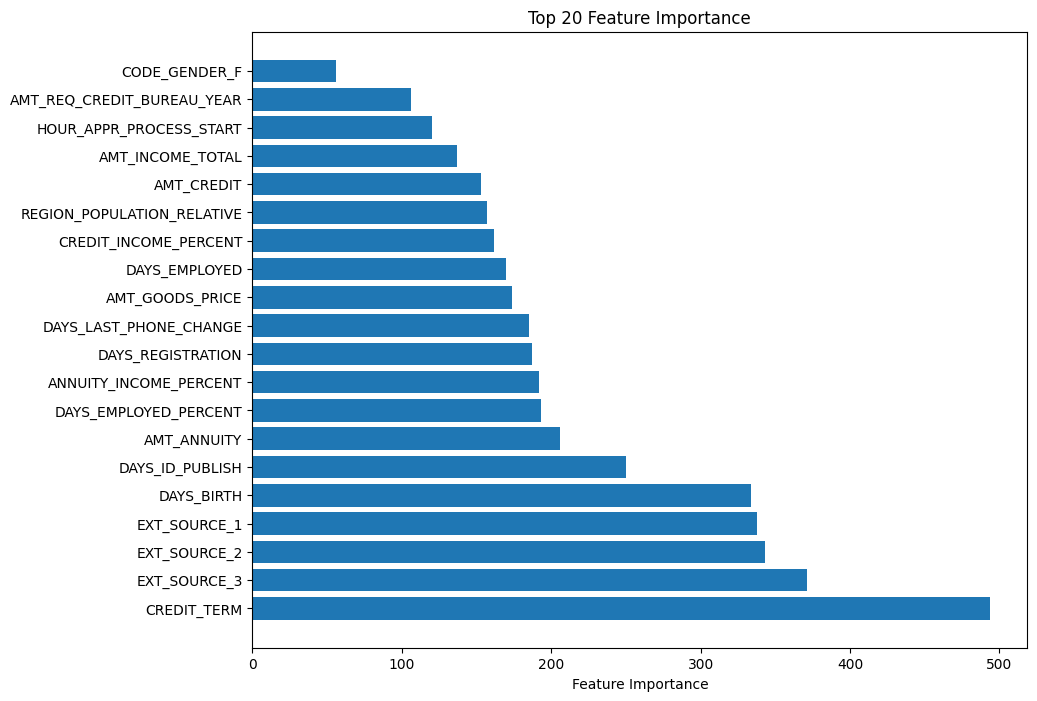

In [ ]:
# Plot the feature importance chart

importance = xgb_model.get_booster().get_fscore()
top_features = sorted(importance.items(), key=lambda x: x[1], reverse=True)[:20]

feature_names, feature_importance = zip(*top_features)

# Plot the feature importance chart for the top 25 features
plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_names)), feature_importance, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importance')
plt.show()

#xgb.plot_importance(xgb_model, importance_type='weight')  # You can change importance_type as needed
#plt.show()

In [ ]:
s = sum(feature_importance)

norm_imp = tuple(value / s for value in feature_importance)

# Print the result
print(norm_imp)

(0.11414048059149723, 0.08572088724584104, 0.07925138632162662, 0.07809611829944547, 0.07717190388170056, 0.057763401109057304, 0.047597042513863215, 0.04459334565619224, 0.04436229205175601, 0.04320702402957486, 0.0427449168207024, 0.040203327171903884, 0.03927911275415896, 0.03743068391866913, 0.036275415896487986, 0.03535120147874307, 0.0316543438077634, 0.027726432532347505, 0.024491682070240297, 0.012939001848428836)


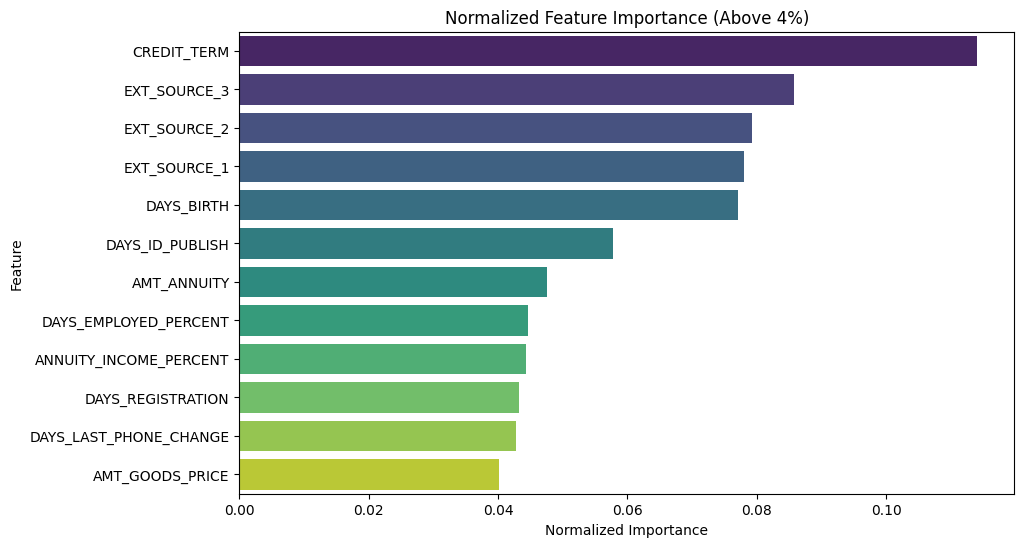

In [ ]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Normalized Importance': norm_imp})

filtered_importance_df = importance_df[importance_df['Normalized Importance'] > 0.04]

# Sort the DataFrame by importance
filtered_importance_df = filtered_importance_df.sort_values(by='Normalized Importance', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Normalized Importance', y='Feature', data=filtered_importance_df, palette='viridis')
plt.title('Normalized Feature Importance (Above 4%)')
plt.xlabel('Normalized Importance')
plt.ylabel('Feature')
plt.show()

The problem with the above approach is that it is not tailored to individual credit applications. The above 20 feaures are the estimated important predictors obtained using the entire training data. While assessing credit applications, companies like Home Credit are responsible to provide an appropriate reason for loan rejection that is specific and customized to that indicvidual. This is not possible directly with black box model results but packages such as SHAP has empowered us to look beyond just the model prediction.

### **SHAP Analysis**

The SHAP (SHapley Additive exPlanations) package in Python is a powerful tool for model interpretability and feature importance analysis. As discuessed earlier, SHAP's key strengths is its ability to explain individual predictions. For a given data point, SHAP values break down the prediction into contributions from each feature, helping us understand why the model made a specific decision. SHAP values are invaluable for diagnosing model behavior as well as examine SHAP values for problematic predictions or cases where the model's performance is suboptimal. This addresses the concerns of bias, outliers, or data quality problems.

In [ ]:
# install shap library
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.0 MB/s eta 0:00:00


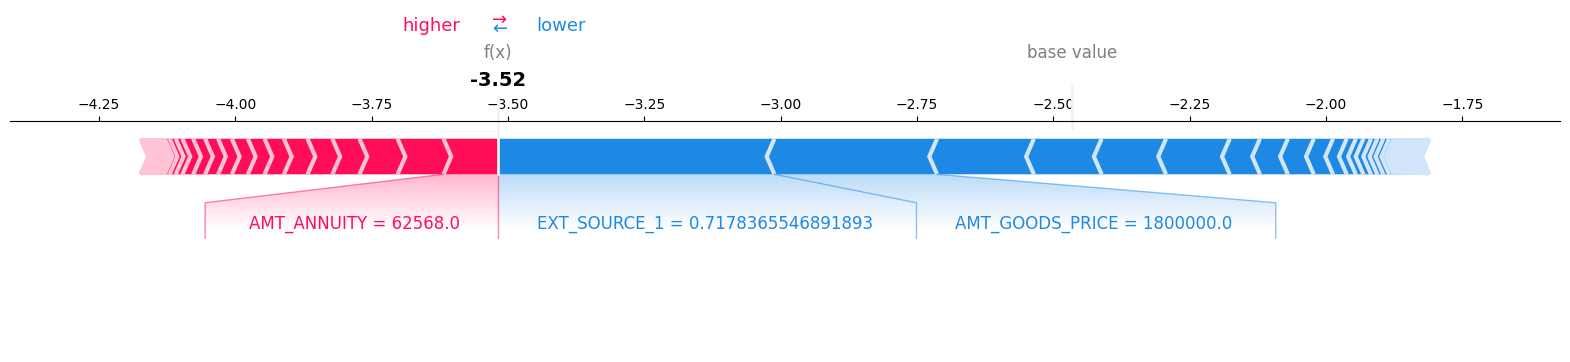

In [ ]:
import shap
import matplotlib.pyplot as plt

model = xgb_model

# Load your data
X = X_train

# Choosing the first data point in train to explain the prediction
data_point = X.iloc[0]

# Initialize the explainer for the model
explainer = shap.TreeExplainer(model)

# Calculate the SHAP values for the selected data point
shap_values = explainer.shap_values(X)

# # Display the force plot
shap.force_plot(explainer.expected_value, shap_values[0], data_point,matplotlib=True)
plt.show()

Shap Force Plot here shows how the various features in our loan prediction model influence its model predictions. The size and direction of the arrows represent the magnitude and direction of the impact of each feature. The base value of nearly -2.4 shap value is essentially the prediction the model would make if no features had any impact. Base value almost being equal to the shap value indicates that the predictor variables have a neutral overall effect on the predicted outcome.

From the Force Plot, the features "EXT Source 2" with a value of 0.21, "Region Rating Client with City" with a value of around 3 and "Amount Goods price" with value of 180000 have positive SHAP values, meaning that they have a positive impact on the model's outcome of whether a client will have payment difficulties. This could mean that having a higher loan annuity or credit amount increases the chance of the model predicting that the client will have loan repayment difficulties.

The features EXT_SOURCE_3 with 0.544 has a negative impact on the model's prediction. This means that having a higher normalized score from an external data source or a higher price of the goods for which the loan is given decreases the chance of the model predicting that the client will have payment difficulties.

Hence, the insights from the force plot can be extremely handy for all the new loan applications where this model predictions can be backed with appropriate factual reasoning for approving/rejecting the loan. For instance, for the first row in the train set example that we have shown above, the loan application is approved because though the customer's External Source 3 might have hurt his chances but other factors such as External Source 2, the city where the client lives and the price of goods for this loan are good enough. Similarly, whenever the customer is rejected for a loan, based on this plot, the client can be informed on why he was declined.

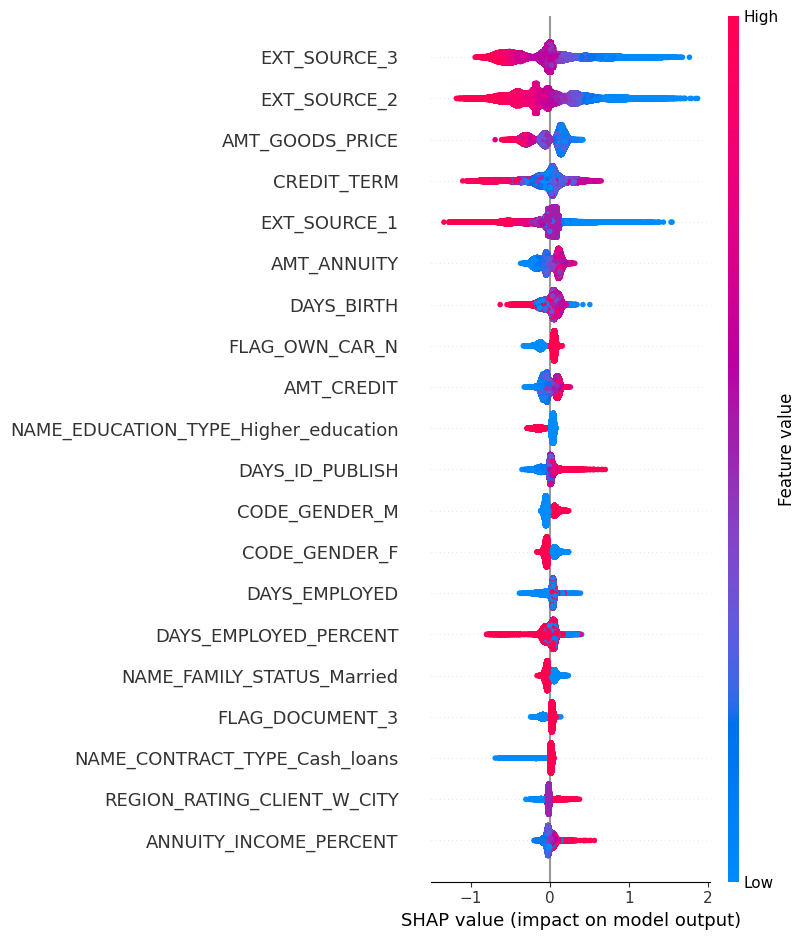

In [ ]:
plt.figure(figsize=(4,6))
shap.summary_plot(shap_values, X_train)

*   SHAP analysis shows how the values of different features influence the model's predictions in a decreasing order of influence from top to bottom. From the summary plot, the features EXT_SOURCE_3, EXT_SOURCE_2, and EXT_SOURCE_1 are inversely correlated to the target variable. This is aligned with our findings from the correlational analysis. Therefore, lower values for these features have a positive influence on the model outcome and push the predicted value higher meaning greater chance of repayment difficulty.
*   It is worth noting that, high values of credit term in most cases would lower the model predicted value but there are cases where the model could actually push the value predicted value higher. There could be other predictors influencing this decision and needs to be further investigated.

*   For the feature DAYS_ID_PUBLISH, higher values are associated with higher predicted outcomes. This shows that individuals who have been on the platform for a longer period of time are more likely to have higher outcomes. For the feature AMT_GOODS_PRICE, there is a cluster of instances with low values (blue points) with small but positive SHAP values. Instances with higher values (red points) extend further towards the left, suggesting that high goods price has a stronger negative impact on target than the positive impact of low goods price on target. Therefore, the model is more likely to predict lower outcomes for individuals with higher values of external sources and higher prices for goods.

Overall, by leveraging the above and other plots from SHAP, Home Credit can gain deeper insights into model behavior, build trust in AI systems, and make informed decisions based on model output making it a crucial tool in the field of interpretable machine learning and model explainability.





# **5. Results** <a name="5"></a>

## **5.1 Final Predictions** <a name="51"></a>

To predict how the models performs on unseen real world data, we must match the preictors that were used for the model training. Therefore, we apply the same data cleaning & preparation with the application_test dataset from kaggle.

In [ ]:
application_test = pd.read_csv("application_test.csv")
skid = application_test['SK_ID_CURR']
application_test_clean = application_test.drop(columns=missing_cor_columns, axis=1)
application_test_clean.shape

(48744, 77)

In [ ]:
# application_test.isna().sum()
for column in application_test_clean.columns:
    if application_test_clean[column].dtype == 'object':
        application_test_clean[column].fillna(application_test_clean[column].mode()[0], inplace=True)

for column in application_test_clean.columns:
    if application_test_clean[column].dtype == 'float':
        application_test_clean[column].fillna(application_test_clean[column].median(), inplace=True)

application_test_clean.isna().sum().sum()

# Dropping the selected columns with less variability
application_test_clean = application_test_clean.drop(columns=selected_columns, axis=1)
application_test_clean.shape

# Dropping multicollinear columns with correlation less than 0.03
drop_columns = ['SK_ID_CURR','CNT_CHILDREN','REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION','OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE']

application_test_clean = application_test_clean.drop(drop_columns, axis=1)
application_test_clean.shape

#Get Dummies
application_test_clean_bckup = application_test_clean # storing the final application_train_final to a dummy variable
application_test_final = pd.get_dummies(application_test_clean)

application_test_final.shape

application_test_final_norm = norm(1,application_test_final)


application_test_final = clean_feature_names(application_test_final)


In [ ]:
application_test_final['CREDIT_INCOME_PERCENT'] = application_test_final['AMT_CREDIT'] / application_test_final['AMT_INCOME_TOTAL']
application_test_final['ANNUITY_INCOME_PERCENT'] = application_test_final['AMT_ANNUITY'] / application_test_final['AMT_INCOME_TOTAL']
application_test_final['CREDIT_TERM'] = application_test_final['AMT_ANNUITY'] / application_test_final['AMT_CREDIT']
application_test_final['DAYS_EMPLOYED_PERCENT'] = application_test_final['DAYS_EMPLOYED'] / application_test_final['DAYS_BIRTH']
application_test_final_norm = norm(1,application_test_final)
application_test_final = clean_feature_names(application_test_final)

**Model predictions on application_test data**

In [ ]:
# Tuned model predictions
logistic_y_final = logistic_regression.predict(application_test_final_norm)
rf_y_final = rf_model.predict_proba(application_test_final)[:, 1]
xgb_y_final = xgb_model.predict_proba(application_test_final)[:, 1]
lightgbm_y_final = lgb_model.predict_proba(application_test_final)[:, 1]
neural_y_final = neural_model.predict(application_test_final_norm)

# Down sampled model predictions
lightgbm_down_y_final = lgb_model_tuned_down_samp.predict_proba(application_test_final)[:, 1]
logistic_regression_down_y_final = logistic_regression_down_samp.predict_proba(application_test_final)[:, 1]
xgb_down_y_final = xgb_model_tuned_down_samp.predict_proba(application_test_final)[:, 1]
rf_down_y_final = rf_model_tuned_down_samp.predict_proba(application_test_final)[:, 1]

# Smote sampled model predictions
lightgbm_smote_y_final = lgb_model_tuned_smote.predict_proba(application_test_final)[:, 1]
logistic_regression_smote_y_final = logistic_regression_smote.predict_proba(application_test_final)[:, 1]
xgb_smote_y_final = xgb_model_tuned_smote.predict_proba(application_test_final)[:, 1]
rf_smote_y_final = rf_model_tuned_smote.predict_proba(application_test_final)[:, 1]



[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
1524/1524 [==============================] - 3s 2ms/step
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


**Preparing Submission File**

In [ ]:
# Setting SKID
skid = application_test['SK_ID_CURR']
final_submission = pd.DataFrame()
final_submission['SK_ID_CURR'] = skid

# Setting Target variable values for Tuned Models in the final submission file
#final_submission['TARGET'] = xgb_y_final
#final_submission['TARGET'] = lightgbm_y_final
#final_submission['TARGET'] = rf_y_final
#final_submission['TARGET'] = neural_y_final
#final_submission['TARGET'] = logistic_y_final


# Setting Target variable values for Down Sampled Models in the final submission file
#final_submission['TARGET'] = lightgbm_down_y_final
#final_submission['TARGET'] = logistic_regression_down_y_final
#final_submission['TARGET'] = xgb_down_y_final
final_submission['TARGET'] = rf_down_y_final


# Setting Target variable values for Smote Sampled Models in the final submission file
#final_submission['TARGET'] = lightgbm_smote_y_final
#final_submission['TARGET'] = logistic_regression_smote_y_final
#final_submission['TARGET'] = xgb_smote_y_final
#final_submission['TARGET'] = rf_smote_y_final

**Output Final Submission CSV File for submission to Kaggle**

In [ ]:
 #final_submission.to_csv("XGB Down Sampled Tuned.csv",index=False)

## **5.2 Model Score Summary** <a name="52"></a>

AUC is the model evaluation metric chosen for selecting the best model. Below is the table that contains AUC scores with the train and test sets, down & smote sampled data, along with their respective kaggle scores

In [ ]:
import pandas as pd

# Create a list of model names and their AUC scores
model_names = ["Logistic Regression","Random Forrest", "XG Boost", "Light GB"]
train_auc_scores = [lg_roc_auc_train, rf_roc_auc_train, xgb_train_roc_auc, lgb_train_roc_auc]
test_auc_scores = [lg_roc_auc_test, rf_roc_auc, xgb_roc_auc, lgb_roc_auc]
accuracy_scores = [lg_accuracy, rf_accuracy, xgb_accuracy, lgb_accuracy]
kaggle_score = [0.637 ,0.735,0.758,0.757]
down_test_auc_scores = [lg_down_roc_auc,rf_tuned_down_roc_auc,xg_tuned_down_roc_auc,lgb_tuned_down_roc_auc]
down_accuracy_scores = [lg_down_accuracy, rf_tuned_down_accuracy, xg_tuned_down_accuracy,lgb_tuned_down_accuracy]
down_kaggle_scores = [0.623,0.739,0.761,0.760]
smote_test_auc_scores = [lg_smote_roc_auc,rf_tuned_smote_roc_auc,xg_tuned_smote_roc_auc,lgb_tuned_smote_roc_auc]
smote_accuracy_scores = [lg_smote_accuracy, rf_tuned_smote_accuracy,xg_tuned_smote_accuracy,lgb_tuned_smote_accuracy]
smote_kaggle_scores = [0.611,0.724,0.748,0.755]


# Create a DataFrame to store the model names and AUC scores
score_summary = pd.DataFrame({'Model Name': model_names, 'Train AUC Score': train_auc_scores, 'Test AUC Score': test_auc_scores,'Test Accuracy Score':accuracy_scores, 'Unsampled Kaggle Score': kaggle_score,'Down Sampled Test AUC Score': down_test_auc_scores,'Down Sampled Accuracy Score':down_accuracy_scores,'Down Sampled Kaggle Score': down_kaggle_scores, 'SMOTE Test AUC Score': smote_test_auc_scores,'Smote Accuracy Score':smote_accuracy_scores,'Smote Sampled Kaggle Score': smote_kaggle_scores})

# Round all the scores to 2 decimals
score_summary = score_summary.round(3)

# Display the DataFrame as a table
pd.set_option('display.max_columns', 20)
pd.set_option('display.width',170)
print(score_summary)


            Model Name  Train AUC Score  Test AUC Score  Test Accuracy Score  Unsampled Kaggle Score  Down Sampled Test AUC Score  Down Sampled Accuracy Score  \
0  Logistic Regression            0.685           0.683                0.688                   0.637                        0.618                        0.818   
1       Random Forrest            0.977           0.748                0.920                   0.735                        0.749                        0.822   
2             XG Boost            0.809           0.768                0.920                   0.758                        0.768                        0.828   
3             Light GB            0.842           0.768                0.920                   0.757                        0.770                        0.830   

   Down Sampled Kaggle Score  SMOTE Test AUC Score  Smote Accuracy Score  Smote Sampled Kaggle Score  
0                      0.623                 0.601                 0.602              

## **5.3 Final Model Selection Criteria** <a name="53"></a>

*   It is evident that all models exhibit higher AUC scores on the training data compared to the test data, indicating a potential issue with overfitting. Random Forest stands out with an exceptionally high training AUC score of 0.97, which is a strong indicator of overfitting.

*   Without any sampling techniques, XG Boost and Light GBM perform comparably well with Kaggle scores around 0.75. In contrast, Logistic Regression lags behind with a Kaggle score of 0.637, signifying its limitations in handling real-world, unseen data effectively.



*   SMOTE sampling noticeably improves model performance. Both XG Boost and Light GBM achieve higher AUC scores, with scores of 0.79 and 0.823, respectively. However, the Kaggle scores reveal a surprising drop, falling to 0.74 and 0.75. This indicates that while the models perform better on synthetic data, they struggle when applied to real-world Kaggle competition data.
*   Down sampling also leads to performance improvements, with AUC scores for XG Boost and Light GBM reaching 0.767 and 0.768, respectively. Notably, the Kaggle scores exhibit less variation compared to the SMOTE scenario, maintaining a high level of performance with scores of 0.761 for XG Boost and 0.760 for Light GBM.




**Overall, the best Kaggle score obtained is 0.761 with tuned XGBoost with randomly down sampled majority class data by 40%.**

# **6. Contribution to the Project** <a name="6"></a>

<!DOCTYPE html>

---


<html>
<head>
</head>
<body>
    <table border="1">
        <tr>
            <th>Name</th>
            <th>Contribution</th>
        <tr>
            <td>Sai Eshwar</td>
            <td>Data Preparation, Feature Engineering Research & Implementation, Under & SMOTE Sampling, Baseline Random Forest & XG Boost, TOC & Headers, Exploratory data analysis, Outlier Analysis, Lightgbm Model, Grid Search of Lightgbm model, XAI & SHAP Plots, tuned lightgbm model, SHAP Analysis and interpretation, Notebook Editing</td>
        </tr>
    </table>
</body>
</html>


## <center><a href='#1'>**Navigate to top**</a>

# **7. Appendix** <a name="6"></a>

## 7.1 Bivariate Analysis <a name="71"></a>

By doing bivariate analysis lets test the below Hypothesis:

1. Ideally Males take more loans and are more suscept to having difficulty in loan repayment.
2. Low skilled workers such as Laborers have the highest loan repayment difficulty.
3. As loan credit amount increases, the chance of default increases.
4. Higher age customers in general have higher chances of default.

### Hypothesis - 1: Males have more loan repayment difficulties than Females

Text(0.5, 1.0, 'Count of Target by Gender')

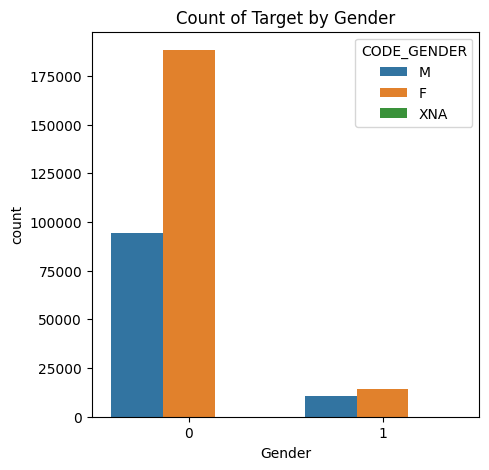

In [ ]:
# Countplot of target variable with respect to gender
fig,ax = plt.subplots(figsize = (5,5))
sns.countplot(x='TARGET',data=application_train,hue='CODE_GENDER')
plt.xlabel("Gender")
plt.title("Count of Target by Gender")

**Suprisingly, it is Females who have taken more loans and are nearly double of Males for non-defaulters. For those with having a difficulty in repayment, Females again are more than Males by a small figure.**

### Hypothesis - 2: Low skilled workers such as Laborers have the highest loan repayment difficulty

Text(0.5, 1.0, 'Count of Target by Occupation Type')

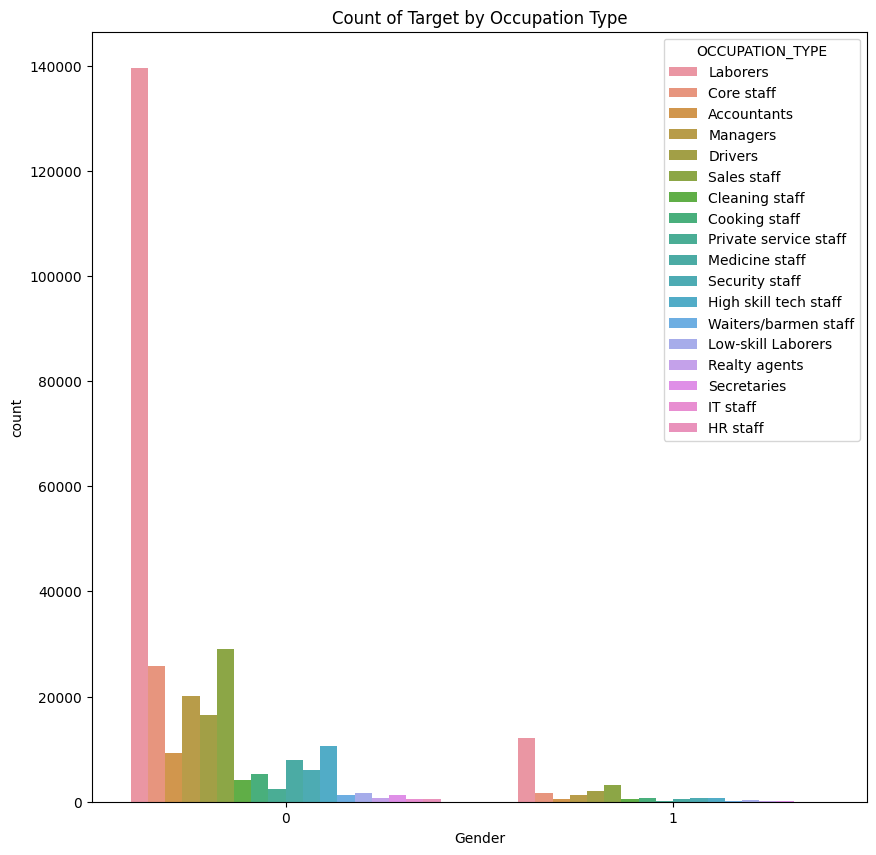

In [ ]:
# Countplot of target variable with respect to OCCUPATION_TYPE
application_train_final['OCCUPATION_TYPE'].head(2)

fig,ax = plt.subplots(figsize = (10,10))
sns.countplot(x='TARGET',data=application_train_final,hue='OCCUPATION_TYPE')
plt.xlabel("Gender")
plt.title("Count of Target by Occupation Type")

Text(0.5, 1.0, 'Count of Occupation Type for defaulters')

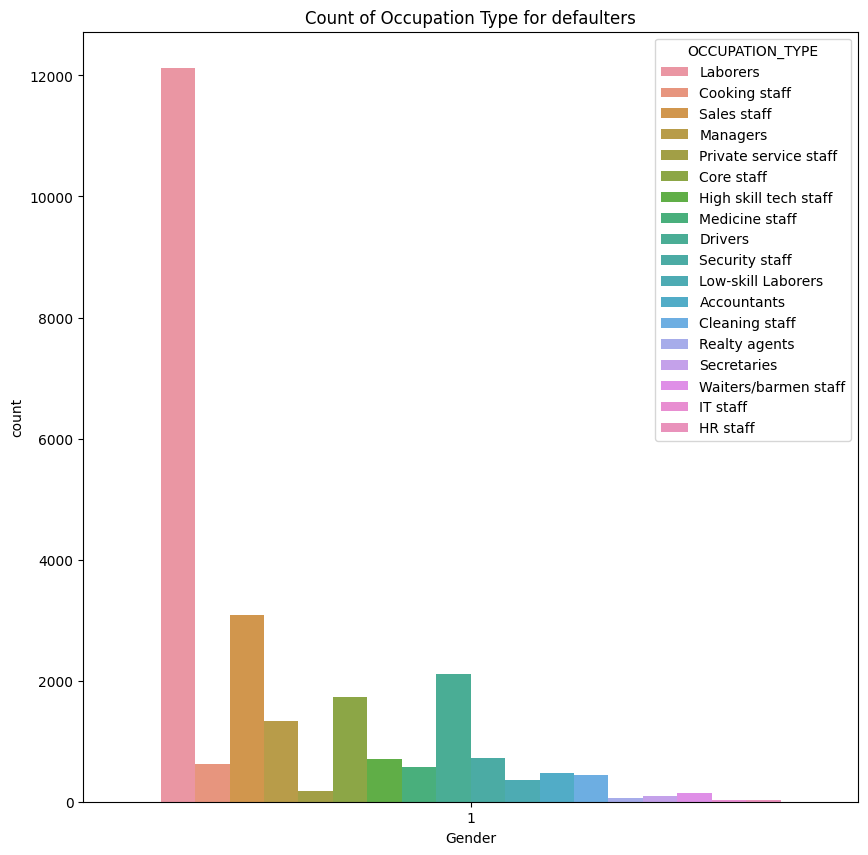

In [ ]:
# Extracting target variable value of 1
fig,ax = plt.subplots(figsize = (10,10))
sns.countplot(x='TARGET', data=application_train_final[application_train_final['TARGET']==1],hue='OCCUPATION_TYPE')
plt.xlabel("Gender")
plt.title("Count of Occupation Type for defaulters")

**Yes, the above plot shows that laborers, drivers and sales staff all have a good percentage of loan defaults.**

### Hypothesis 3: As loan credit amount increases, the chance of default increases

Text(0.5, 1.0, 'Target vs Amount of Credit')

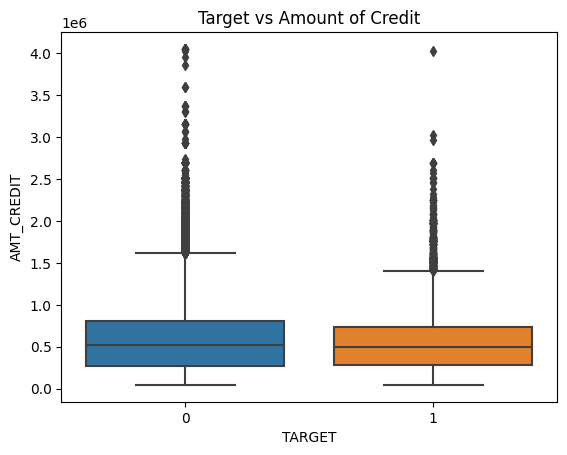

In [ ]:
# Boxplot of target variable with respect to AMT_CREDIT
sns.boxplot(application_train, x='TARGET', y='AMT_CREDIT')
plt.title("Target vs Amount of Credit")

Text(0.5, 1.0, 'Target vs Amount of Credit')

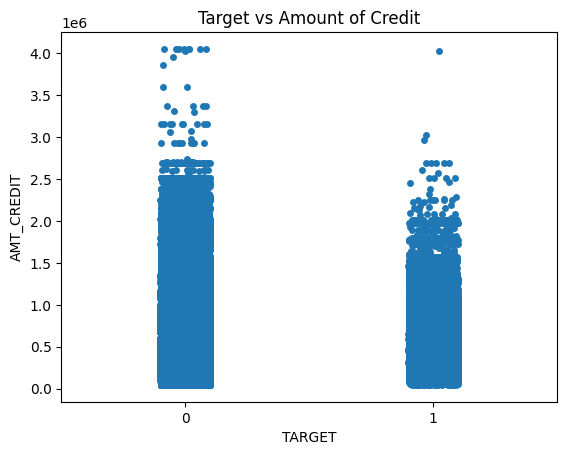

In [ ]:
# Strip plot of the same
sns.stripplot(application_train, x='TARGET', y='AMT_CREDIT')
plt.title("Target vs Amount of Credit")

**This is interesting. There is not much of a difference and in fact it looks like greater proportion of high loan credit amount linked consumers have repaid their loans.**

### Hypothesis 4: Higher age customers have higher chance of default

Text(0.5, 1.0, 'Target vs Age')

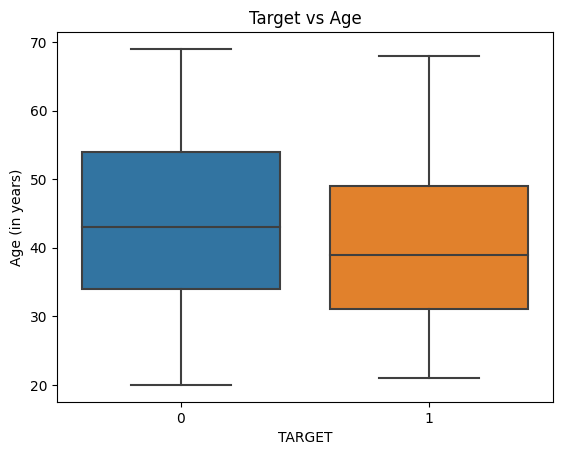

In [ ]:
#Testing for Higher age customers have higher chance of default
application_train_final['Year']= (application_train['DAYS_BIRTH'] / (-365)).astype(int)
sns.boxplot(application_train_final, x='TARGET', y='Year')
plt.ylabel('Age (in years)')

plt.title("Target vs Age")

**The hypothesis stands good as higher age customers have higher chance of default.**